# Task
¿Puedes realizar un análisis exploratorio de datos (EDA) y para los casos de robo en el metro de la ciudad? Además, es importante distinguir en el metro y el metrobus. Incluye cualquier estrategia útil para obtener insights generales sobre el robo en el metro, operaciones de ingeniería de características y un análisis comparativo con otras modalidades de transporte, así como un análisis exclusivo en el robo en el metro.

Here is all the data you need:
"carpetasFGJ_acumulado_2025_01.csv"

## Data loading

### Subtask:
Load the dataset.


**Reasoning**:
Load the dataset and display the first few rows and the shape of the DataFrame.



In [2]:
import pandas as pd


try:
    df = pd.read_csv('/content/drive/MyDrive/PP_Robo_Metro_CDMX/Nootebooks/carpetasFGJ_acumulado_2025_01.csv', encoding='UTF-8')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'carpetasFGJ_acumulado_2025_01.csv' not found.")
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Check the file format and encoding.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

<ipython-input-2-372ab51d53c3>:5: DtypeWarning: Columns (10,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/PP_Robo_Metro_CDMX/Nootebooks/carpetasFGJ_acumulado_2025_01.csv', encoding='UTF-8')


,anio_inicio,mes_inicio,fecha_inicio,hora_inicio,anio_hecho,mes_hecho,fecha_hecho,hora_hecho,delito,categoria_delito,...,fiscalia,agencia,unidad_investigacion,colonia_hecho,colonia_catalogo,alcaldia_hecho,alcaldia_catalogo,municipio_hecho,latitud,longitud
0,2016,Enero,2016-01-01,00:00:00,2015.0,Diciembre,2015-12-31,16:30:00,LESIONES CULPOSAS POR TRANSITO VEHICULAR EN CO...,DELITO DE BAJO IMPACTO,...,INVESTIGACIÓN EN TLALPAN,TLP-4,UI-2CD,JARDINES EN LA MONTAÑA,Jardines En La Montaña,TLALPAN,NaN,CDMX,19.30086,-99.20877
1,2016,Enero,2016-01-01,00:00:00,2015.0,Diciembre,2015-12-31,22:40:00,ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA,ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA,...,INVESTIGACIÓN EN TLALPAN,TLP-1,UI-2CD,LOMAS DE PADIERNA,Lomas De Padierna,TLALPAN,NaN,CDMX,19.29003,-99.21748
2,2016,Enero,2016-01-01,00:00:00,2016.0,Enero,2016-01-01,00:20:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,...,INVESTIGACIÓN EN IZTAPALAPA,IZP-2,UI-2CD,SAN ANTONIO CULHUACÁN,Barrio San Antonio Culhuacan,IZTAPALAPA,NaN,CDMX,19.34080,-99.11431
3,2016,Enero,2016-01-01,00:00:00,2015.0,Diciembre,2015-12-31,22:00:00,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,...,INVESTIGACIÓN EN GUSTAVO A. MADERO,GAM-8,UI-2CD,SAN JUAN DE ARAGÓN II SECCIÓN,San Juan De Aragon Ii Seccion,GUSTAVO A. MADERO,NaN,CDMX,19.45106,-99.08669
4,2016,Enero,2016-01-01,00:00:00,2015.0,Diciembre,2015-12-31,22:30:00,HOMICIDIOS INTENCIONALES (OTROS),HOMICIDIO DOLOSO,...,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-1,UI-2SD,NATIVITAS,Nativitas,BENITO JUAREZ,NaN,CDMX,19.38095,-99.13982


(2098743, 21)


**Reasoning**:
The data is loaded, but there's a warning about mixed types in columns 10 and 17.  I'll address this and then finish the subtask.



## Data exploration

### Subtask:
Explore the dataset to understand its structure, identify missing values, data types, and distributions of key variables.


**Reasoning**:
Analyze the distribution of key variables, including data types, missing values, and unique values for relevant columns.



In [3]:
import numpy as np
import matplotlib.pyplot as plt
# --- Exploración Inicial de Datos (EDA) ---
if df is not None:
    print("\n--- Tipos de Datos ---")
    print(df.dtypes)

    print("\n--- Valores Faltantes (%) ---")
    missing_values = df.isnull().sum()
    missing_percentage = (missing_values / len(df)) * 100
    missing_info = pd.DataFrame({'Missing Count': missing_values, 'Missing %': missing_percentage})
    # Mostrar solo columnas con al menos un valor faltante
    display(missing_info[missing_info['Missing Count'] > 0].sort_values(by='Missing %', ascending=False))

    print("\n--- Exploración de Fechas y Horas del Hecho ---")
    # Convertir 'fecha_hecho' a datetime (manejo más robusto)
    # Primero limpia valores obvios que no son fechas si es necesario
    df['fecha_hecho'] = df['fecha_hecho'].replace('nan', np.nan) # Reemplazar string 'nan' por NaN si existen
    df['fecha_hecho'] = pd.to_datetime(df['fecha_hecho'], errors='coerce')

    # Convertir 'hora_hecho' a string y limpiar si es necesario (ej. quitar segundos si son siempre :00)
    df['hora_hecho'] = df['hora_hecho'].astype(str).str.split(':').str[0] + ':' + df['hora_hecho'].astype(str).str.split(':').str[1] # Mantener solo HH:MM
    # Intentar convertir hora a formato de hora de pandas (opcional, depende del análisis)
    # df['hora_hecho_pd'] = pd.to_datetime(df['hora_hecho'], format='%H:%M', errors='coerce').dt.time

    # Combinar fecha y hora del hecho para un timestamp completo
    # Necesitamos que tanto fecha_hecho como hora_hecho sean válidas
    df['fecha_hora_hecho'] = pd.to_datetime(df['fecha_hecho'].astype(str) + ' ' + df['hora_hecho'].astype(str), errors='coerce')

    print(f"\nFechas del hecho válidas: {df['fecha_hecho'].notna().sum()} de {len(df)}")
    print(f"Fechas y horas del hecho válidas (combinadas): {df['fecha_hora_hecho'].notna().sum()} de {len(df)}")

    print(f"\nRango de fechas_hecho: {df['fecha_hecho'].min()} a {df['fecha_hecho'].max()}")
    print(f"Rango de fechas_hora_hecho: {df['fecha_hora_hecho'].min()} a {df['fecha_hora_hecho'].max()}")

    print("\nConteo de horas del hecho (solo las 10 más frecuentes):")
    print(df['hora_hecho'].value_counts().head(10))

    print("\n--- Exploración de Ubicación ---")
    print("\nConteo de alcaldia_hecho:")
    print(df['alcaldia_hecho'].value_counts())
    print("\nConteo de alcaldia_catalogo:")
    print(df['alcaldia_catalogo'].value_counts())

    print("\n--- Exploración de Delitos ---")
    print("\nConteo de los 20 delitos más frecuentes:")
    print(df['delito'].value_counts().head(20))

    print("\nConteo de Categoria_delito:")
    print(df['categoria_delito'].value_counts())

    # --- Exploración de Coordenadas ---
    print("\n--- Exploración de Coordenadas (latitud, longitud) ---")
    print(f"Registros con latitud y longitud no nulas: {df[['latitud', 'longitud']].notna().all(axis=1).sum()} de {len(df)}")
    # Puedes explorar el rango de coordenadas para ver si parecen razonables (dentro de CDMX)
    print(f"Rango de latitud: {df['latitud'].min()} a {df['latitud'].max()}")
    print(f"Rango de longitud: {df['longitud'].min()} a {df['longitud'].max()}")


--- Tipos de Datos ---
anio_inicio               int64
mes_inicio               object
fecha_inicio             object
hora_inicio              object
anio_hecho              float64
mes_hecho                object
fecha_hecho              object
hora_hecho               object
delito                   object
categoria_delito         object
competencia              object
fiscalia                 object
agencia                  object
unidad_investigacion     object
colonia_hecho            object
colonia_catalogo         object
alcaldia_hecho           object
alcaldia_catalogo        object
municipio_hecho          object
latitud                 float64
longitud                float64
dtype: object

--- Valores Faltantes (%) ---


,Missing Count,Missing %
alcaldia_catalogo,2081157,99.162070
competencia,1064018,50.697870
colonia_catalogo,124440,5.929263
colonia_hecho,102124,4.865960
latitud,101207,4.822267
longitud,101207,4.822267
alcaldia_hecho,24896,1.186234
unidad_investigacion,978,0.046599
hora_hecho,887,0.042263
fecha_hecho,560,0.026683



--- Exploración de Fechas y Horas del Hecho ---

Fechas del hecho válidas: 2044628 de 2098743
Fechas y horas del hecho válidas (combinadas): 2044289 de 2098743

Rango de fechas_hecho: 1906-06-02 00:00:00 a 2024-10-31 00:00:00
Rango de fechas_hora_hecho: 1906-06-02 19:00:00 a 2024-10-31 23:30:00

Conteo de horas del hecho (solo las 10 más frecuentes):
hora_hecho
12:00    197552
10:00     84011
11:00     47815
09:00     47204
15:00     45582
14:00     44736
16:00     41421
20:00     39683
18:00     39108
17:00     38811
Name: count, dtype: int64

--- Exploración de Ubicación ---

Conteo de alcaldia_hecho:
alcaldia_hecho
CUAUHTEMOC                318787
IZTAPALAPA                304367
GUSTAVO A. MADERO         209034
BENITO JUAREZ             164576
COYOACAN                  142074
ALVARO OBREGON            140019
MIGUEL HIDALGO            130574
TLALPAN                   125799
VENUSTIANO CARRANZA       118736
AZCAPOTZALCO               98994
IZTACALCO                  89879
XOCHIMILCO

In [4]:
print(df['alcaldia_hecho'].unique())

['TLALPAN' 'IZTAPALAPA' 'GUSTAVO A. MADERO' 'BENITO JUAREZ' 'COYOACAN'
 'MIGUEL HIDALGO' 'AZCAPOTZALCO' 'VENUSTIANO CARRANZA' 'IZTACALCO'
 'ALVARO OBREGON' 'CUAUHTEMOC' 'XOCHIMILCO' nan 'LA MAGDALENA CONTRERAS'
 'TLAHUAC' 'MILPA ALTA' 'CUAJIMALPA DE MORELOS' 'CDMX (indeterminada)']


In [5]:
print("--- Exploración DETALLADA de Delitos ---")
if df is not None and 'delito' in df.columns:
    # Filtrar solo los delitos que probablemente sean robos en transporte o a transeúnte
    # Usa palabras clave amplias para no perder nada
    transporte_transeunte_delitos = df['delito'].str.contains('ROBO A PASAJERO|ROBO A TRANSEUNTE|ROBO EN TRANSPORTE|METRO|METROBUS|CABLEBUS|TAXI|MICROBUS|PEATON', case=False, na=False)
    print("Valores únicos en 'delito' (filtrado por palabras clave de transporte/transeúnte):")
    delitos_relevantes = sorted(df[transporte_transeunte_delitos]['delito'].unique())
    for delito_nombre in delitos_relevantes:
        print(delito_nombre)
    print(f"\nTotal de delitos relevantes encontrados: {len(delitos_relevantes)}")
else:
    print("DataFrame 'df' no cargado o columna 'delito' no encontrada.")

# Opcional: Verificar también las categorías de delito relevantes
print("\nValores únicos en 'categoria_delito' (filtrado por palabras clave):")
if df is not None and 'categoria_delito' in df.columns:
    categorias_relevantes = df['categoria_delito'].str.contains('ROBO A PASAJERO|ROBO A TRANSEUNTE|ROBO EN TRANSPORTE|METRO|METROBUS|CABLEBUS|TAXI|MICROBUS|PEATON', case=False, na=False)
    categorias_unicas_relevantes = sorted(df[categorias_relevantes]['categoria_delito'].unique())
    for cat_nombre in categorias_unicas_relevantes:
         print(cat_nombre)
else:
    print("DataFrame 'df' no cargado o columna 'categoria_delito' no encontrada.")

--- Exploración DETALLADA de Delitos ---
Valores únicos en 'delito' (filtrado por palabras clave de transporte/transeúnte):
PERDIDA DE LA VIDA POR SUICIDIO EN EL METRO
ROBO A PASAJERO / CONDUCTOR DE TAXI CON VIOLENCIA
ROBO A PASAJERO / CONDUCTOR DE VEHICULO CON VIOLENCIA
ROBO A PASAJERO A BORDO DE CABLEBUS CON VIOLENCIA
ROBO A PASAJERO A BORDO DE CABLEBUS SIN VIOLENCIA
ROBO A PASAJERO A BORDO DE METRO CON VIOLENCIA
ROBO A PASAJERO A BORDO DE METRO SIN VIOLENCIA
ROBO A PASAJERO A BORDO DE METROBUS CON VIOLENCIA
ROBO A PASAJERO A BORDO DE METROBUS SIN VIOLENCIA
ROBO A PASAJERO A BORDO DE PESERO COLECTIVO CON VIOLENCIA
ROBO A PASAJERO A BORDO DE PESERO COLECTIVO SIN VIOLENCIA
ROBO A PASAJERO A BORDO DE PESERO Y VEHICULO CON VIOLENCIA
ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA
ROBO A PASAJERO A BORDO DE TAXI SIN VIOLENCIA
ROBO A PASAJERO A BORDO DE TRANSPORTE PÚBLICO CON VIOLENCIA
ROBO A PASAJERO A BORDO DE TRANSPORTE PÚBLICO SIN VIOLENCIA
ROBO A PASAJERO EN AUTOBUS FORANEO SIN VIOLENCI

## Data cleaning

### Subtask:
Clean the data by handling missing values, ensuring data consistency, removing duplicates, and converting date/time columns to the correct data type.


**Reasoning**:
Handle missing values, ensure data consistency, remove duplicates, and convert date/time columns to the correct data type.



In [6]:
# CELDA 4: Limpieza, Creación de Variables y Filtrado (VERSIÓN REFACTORIZADA Y SIMPLIFICADA)
# Asume que la Celda 2 (EDA) ya creó la columna 'fecha_hora_hecho'

print("\n--- CELDA 4: Limpieza, Creación de Variables y Filtrado ---")

# --- Limpieza Inicial del DataFrame Original (df) ---
if df is not None:
    print("\n--- Limpieza Inicial de df ---")
    initial_rows_total = len(df)

    # 1. Eliminar filas con fecha/hora_hecho inválida (NaT)
    df.dropna(subset=['fecha_hora_hecho'], inplace=True)
    print(f"Filas después de dropna(fecha_hora_hecho): {len(df)} (Eliminadas: {initial_rows_total - len(df)})")
    initial_rows_after_date = len(df)

    # 2. Filtrar fechas anómalas (anteriores a 2016)
    df = df[df['fecha_hora_hecho'].dt.year >= 2016].copy()
    print(f"Filas después de filtrar por año >= 2016: {len(df)} (Eliminadas: {initial_rows_after_date - len(df)})")
    initial_rows_after_year = len(df)

    # 3. Crear y limpiar columna 'alcaldia'
    print("\n--- Creando y limpiando columna 'alcaldia' ---")
    df['alcaldia'] = df['alcaldia_hecho'].str.upper().str.strip()
    df.dropna(subset=['alcaldia'], inplace=True)
    print(f"Filas después de dropna(alcaldia): {len(df)} (Eliminadas por alcaldia nula: {initial_rows_after_year - len(df)})")
    initial_rows_after_alcaldia = len(df)

    # 4. Manejo de Coordenadas (eliminar filas con NaNs)
    df.dropna(subset=['latitud', 'longitud'], inplace=True)
    print(f"Filas después de dropna(latitud, longitud): {len(df)} (Eliminadas por coords nulas: {initial_rows_after_alcaldia - len(df)})")
    print(f"Total de registros en df después de limpieza inicial: {len(df)}")


    # --- Creación de Variables Temporales ---
    print("\n--- Creando Variables Temporales ---")
    df['day_of_week'] = df['fecha_hora_hecho'].dt.dayofweek
    df['hour_of_day'] = df['fecha_hora_hecho'].dt.hour
    df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)

    # (Opcional) Crear is_morning_rush y is_evening_rush aquí si quieres
    df['is_morning_rush'] = ((df['hour_of_day'] >= 7) & (df['hour_of_day'] <= 9)).astype(int)
    df['is_evening_rush'] = ((df['hour_of_day'] >= 18) & (df['hour_of_day'] <= 20)).astype(int)


    # --- Creación de Variables de Identificación de Tipo de Robo y Modo de Transporte ---
    print("\n--- Identificando Tipos de Robo y Modo de Transporte ---")

    # **USA LOS STRINGS EXACTOS QUE OBTUVISTE DE LA CELDA 3 (Exploración Detallada de Delitos)**
    # **PRIORIZA 'categoria_delito' si los conteos son correctos allí para Metro y Metrobus.**

    # Ejemplo usando categoria_delito para Metro y Metrobus (ajusta los strings si son diferentes)
    df['is_metro_robo'] = (df['categoria_delito'] == 'ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA').astype(int)
    df['is_metrobus_robo'] = (df['categoria_delito'] == 'ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA').astype(int)

    # Ejemplo usando 'delito' para otros (ajusta los strings)
    df['is_cablebus_robo'] = df['delito'].str.contains('CABLEBUS', case=False, na=False).astype(int)
    df['is_taxi_robo'] = df['delito'].str.contains('ROBO A PASAJERO A BORDO DE TAXI', case=False, na=False).astype(int)
    df['is_otro_vehiculo_robo'] = df['delito'].str.contains('ROBO A PASAJERO', case=False, na=False).astype(int)
    df['is_transeunte_robo'] = df['delito'].str.contains('ROBO A TRANSEUNTE EN VIA PUBLICA', case=False, na=False).astype(int)

    # Verificar conteos de las columnas binarias (¡CRUCIAL!)
    print("\nConteo de robos por tipo específico (binarias):")
    print(df[['is_metro_robo', 'is_metrobus_robo', 'is_cablebus_robo', 'is_taxi_robo', 'is_otro_vehiculo_robo', 'is_transeunte_robo']].sum())


    # Crear una columna general 'transport_mode'
    def map_to_transport_mode(row):
        if row['is_metro_robo']: return 'Metro'
        elif row['is_metrobus_robo']: return 'Metrobus'
        elif row['is_cablebus_robo']: return 'Cablebus'
        elif row['is_taxi_robo']: return 'Taxi'
        elif row['is_otro_vehiculo_robo']: return 'Otro Vehiculo'
        elif row['is_transeunte_robo']: return 'Transeunte'
        else: return 'Otro Delito' # O 'No Identificado'

    df['transport_mode'] = df.apply(map_to_transport_mode, axis=1)
    print("\nConteo por 'transport_mode' (categórica general):")
    print(df['transport_mode'].value_counts())


    # --- Filtrar DataFrames Específicos ---
    print("\n--- Filtrando DataFrames Específicos ---")
    # DataFrame con todos los robos de transporte/transeúnte identificados
    df_transporte_transeunte_robos = df[
        df['transport_mode'].isin(['Metro', 'Metrobus', 'Cablebus', 'Taxi', 'Otro Vehiculo', 'Transeunte'])
    ].copy()
    print(f"Dimensiones de df_transporte_transeunte_robos: {df_transporte_transeunte_robos.shape}")

    # DataFrames individuales si los necesitas para análisis específicos
    df_metro = df[df['transport_mode'] == 'Metro'].copy() # O usa df[df['is_metro_robo'] == 1]
    df_metrobus = df[df['transport_mode'] == 'Metrobus'].copy() # O usa df[df['is_metrobus_robo'] == 1]
    # ... crea otros DataFrames filtrados si los necesitas ...
    print(f"Dimensiones de df_metro: {df_metro.shape}")
    print(f"Dimensiones de df_metrobus: {df_metrobus.shape}")


    # --- Selección Final de Columnas (Opcional, pero recomendado) ---
    # Define las columnas que quieres mantener en tus DataFrames finales
    columnas_a_mantener = [
        'fecha_hora_hecho', 'anio_hecho', 'mes_hecho', 'hora_hecho', # Temporales
        'delito', 'categoria_delito', # Descriptivas del delito
        'alcaldia_hecho', 'colonia_hecho', 'alcaldia', # Ubicación
        'latitud', 'longitud', # Coordenadas
        'day_of_week', 'hour_of_day', 'is_weekend',
        'is_morning_rush', 'is_evening_rush',
        # Variables temporales creadas
        'is_metro_robo', 'is_metrobus_robo', 'is_cablebus_robo', # Binarizadas (útiles para flags)
        'is_taxi_robo', 'is_otro_vehiculo_robo', 'is_transeunte_robo',
        'transport_mode' # Categoría general
    ]
    # Asegurarse de que las columnas existen antes de seleccionarlas
    columnas_existentes_df = [col for col in columnas_a_mantener if col in df.columns]
    columnas_existentes_metro = [col for col in columnas_a_mantener if col in df_metro.columns]
    # ... y para los otros DataFrames filtrados ...

    df = df[columnas_existentes_df].copy() # DataFrame original con solo columnas relevantes
    df_metro = df_metro[columnas_existentes_metro].copy()
    # ... y para los otros DataFrames filtrados ...

    print("\n--- Limpieza, Creación de Variables y Filtrado Completados ---")
    print(f"Columnas finales en df: {df.columns.tolist()}")
    print(f"Columnas finales en df_metro: {df_metro.columns.tolist()}")
    # ... y para los otros DataFrames filtrados ...

    print("\nPrimeras filas de df (después de todo el procesamiento):")
    display(df.head())
    print("\nPrimeras filas de df_metro:")
    display(df_metro.head())

else:
    print("DataFrame 'df' no se cargó. No se pueden realizar operaciones.")


--- CELDA 4: Limpieza, Creación de Variables y Filtrado ---

--- Limpieza Inicial de df ---
Filas después de dropna(fecha_hora_hecho): 2044289 (Eliminadas: 54454)
Filas después de filtrar por año >= 2016: 2011859 (Eliminadas: 32430)

--- Creando y limpiando columna 'alcaldia' ---
Filas después de dropna(alcaldia): 1988990 (Eliminadas por alcaldia nula: 22869)
Filas después de dropna(latitud, longitud): 1917089 (Eliminadas por coords nulas: 71901)
Total de registros en df después de limpieza inicial: 1917089

--- Creando Variables Temporales ---

--- Identificando Tipos de Robo y Modo de Transporte ---

Conteo de robos por tipo específico (binarias):
is_metro_robo             14369
is_metrobus_robo           6095
is_cablebus_robo             11
is_taxi_robo                826
is_otro_vehiculo_robo     58281
is_transeunte_robo       100717
dtype: int64

Conteo por 'transport_mode' (categórica general):
transport_mode
Otro Delito      1758091
Transeunte        100717
Otro Vehiculo      3

,fecha_hora_hecho,anio_hecho,mes_hecho,hora_hecho,delito,categoria_delito,alcaldia_hecho,colonia_hecho,alcaldia,latitud,...,is_weekend,is_morning_rush,is_evening_rush,is_metro_robo,is_metrobus_robo,is_cablebus_robo,is_taxi_robo,is_otro_vehiculo_robo,is_transeunte_robo,transport_mode
2,2016-01-01 00:20:00,2016.0,Enero,00:20,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,IZTAPALAPA,SAN ANTONIO CULHUACÁN,IZTAPALAPA,19.34080,...,0,0,0,0,0,0,0,0,1,Transeunte
10,2016-01-01 01:45:00,2016.0,Enero,01:45,LESIONES CULPOSAS POR TRANSITO VEHICULAR EN CO...,DELITO DE BAJO IMPACTO,IZTAPALAPA,CERRO DE LA ESTRELLA,IZTAPALAPA,19.31861,...,0,0,0,0,0,0,0,0,0,Otro Delito
12,2016-01-01 01:15:00,2016.0,Enero,01:15,DAÑO EN PROPIEDAD AJENA INTENCIONAL A AUTOMOVIL,DELITO DE BAJO IMPACTO,MIGUEL HIDALGO,POPOTLA,MIGUEL HIDALGO,19.45716,...,0,0,0,0,0,0,0,0,0,Otro Delito
15,2016-01-01 01:30:00,2016.0,Enero,01:30,ROBO A CASA HABITACION SIN VIOLENCIA,DELITO DE BAJO IMPACTO,COYOACAN,LOS CEDROS,COYOACAN,19.31267,...,0,0,0,0,0,0,0,0,0,Otro Delito
16,2016-01-01 02:00:00,2016.0,Enero,02:00,DAÑO EN PROPIEDAD AJENA INTENCIONAL A NEGOCIO,DELITO DE BAJO IMPACTO,AZCAPOTZALCO,SANTA MARIA MALINALCO,AZCAPOTZALCO,19.47936,...,0,0,0,0,0,0,0,0,0,Otro Delito



Primeras filas de df_metro:


,fecha_hora_hecho,anio_hecho,mes_hecho,hora_hecho,delito,categoria_delito,alcaldia_hecho,colonia_hecho,alcaldia,latitud,...,is_weekend,is_morning_rush,is_evening_rush,is_metro_robo,is_metrobus_robo,is_cablebus_robo,is_taxi_robo,is_otro_vehiculo_robo,is_transeunte_robo,transport_mode
853,2016-01-02 14:00:00,2016.0,Enero,14:00,ROBO A PASAJERO A BORDO DE METRO SIN VIOLENCIA,ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VI...,CUAUHTEMOC,CENTRO,CUAUHTEMOC,19.43717,...,1,0,0,1,0,0,0,1,0,Metro
924,2016-01-04 14:50:00,2016.0,Enero,14:50,ROBO A PASAJERO A BORDO DE METRO CON VIOLENCIA,ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VI...,CUAUHTEMOC,GUERRERO,CUAUHTEMOC,19.43753,...,0,0,0,1,0,0,0,1,0,Metro
943,2016-01-04 14:50:00,2016.0,Enero,14:50,ROBO A PASAJERO A BORDO DE METRO CON VIOLENCIA,ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VI...,CUAUHTEMOC,CENTRO,CUAUHTEMOC,19.43329,...,0,0,0,1,0,0,0,1,0,Metro
1193,2016-01-05 06:25:00,2016.0,Enero,06:25,ROBO A PASAJERO A BORDO DE METRO CON VIOLENCIA,ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VI...,TLAHUAC,LOS OLIVOS,TLAHUAC,19.30432,...,0,0,0,1,0,0,0,1,0,Metro
1569,2016-01-05 20:00:00,2016.0,Enero,20:00,ROBO A PASAJERO A BORDO DE METRO CON VIOLENCIA,ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VI...,CUAUHTEMOC,CENTRO,CUAUHTEMOC,19.43331,...,0,0,1,1,0,0,0,1,0,Metro


## Data wrangling

### Subtask:
Data Wrangling: Feature Engineering and Dataframe Separation


**Reasoning**:
Create new features 'day_of_week' and 'hour_of_day', and the 'transport_mode' column based on 'alcaldia_hecho'. Then, split the DataFrame into 'df_metro' and 'df_metrobus' and create the binary 'is_metro' feature.




--- Generando gráfica agrupada y mejorada de Robos por Alcaldía y Tipo de Transporte ---
Registros para graficar después de filtrar por categorías de transporte: 58281
Tipos de transporte que se graficarán: ['Otro Vehiculo' 'Metrobus' 'Metro' 'Taxi' 'Cablebus']


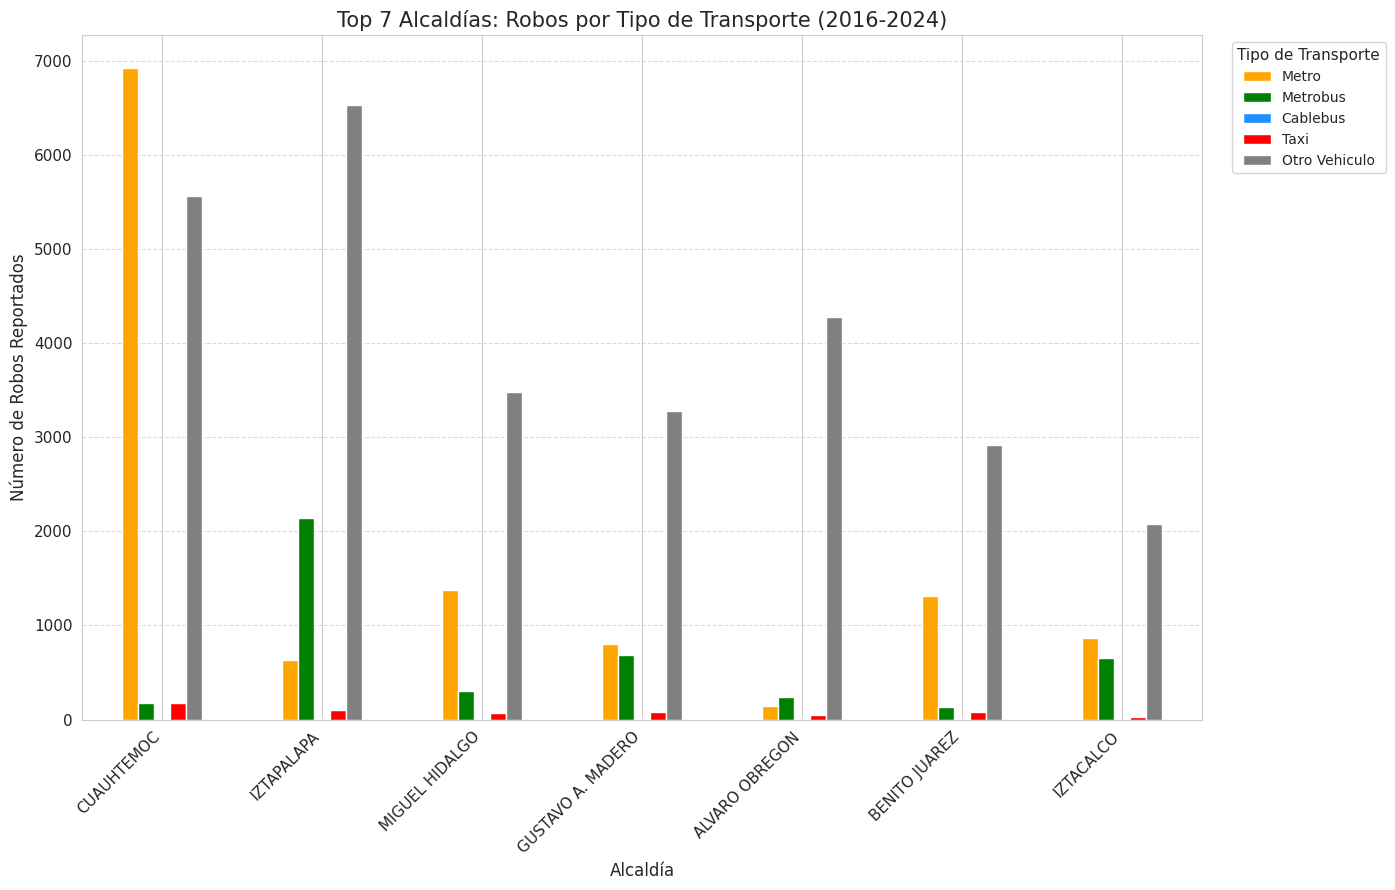

Gráfica generada para Top 7 alcaldías y tipos de transporte seleccionados.

--- Reflexión sobre la Distribución por Alcaldía (Top 7, Transporte) ---
Observación inicial: Esta gráfica permite una comparación directa de la magnitud de robos por tipo de transporte en las alcaldías con mayor incidencia general en estos modos.
Consideraciones críticas:
- ¿La alcaldía con más robos en Metro también lidera en otros tipos de transporte?
- ¿Hay alcaldías donde un tipo de transporte específico (ej. Taxi) es desproporcionadamente alto comparado con otros?
- ¿Cómo se compara esto con la gráfica anterior que incluía 'Transeunte'? ¿Cambia el ranking de las Top alcaldías?
Sigue siendo crucial considerar la normalización por exposición al riesgo para comparaciones más profundas.


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Asegurarse de importar pandas

# Asumimos que df_transporte_transeunte_robos existe y tiene:
# 'alcaldia' y la columna 'transport_mode' para identificar las categorías
# y que la Celda 4 (Limpieza/Variables/Filtrado) se ejecutó correctamente.

# --- Configuración General para Visualizaciones ---
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 10 # Tamaño de fuente ligeramente más pequeño para más etiquetas

# Usa el rango real de fechas en los datos filtrados
min_year = df_transporte_transeunte_robos['fecha_hora_hecho'].dt.year.min()
max_year = df_transporte_transeunte_robos['fecha_hora_hecho'].dt.year.max()
period_title = f"({min_year}-{max_year})" # Título para el periodo de los datos

print("\n--- Generando gráfica agrupada y mejorada de Robos por Alcaldía y Tipo de Transporte ---")

# 1. Definir las CATEGORÍAS DE TRANSPORTE a visualizar (excluyendo Transeúnte para este gráfico comparativo de transportes)
# Puedes ajustar esta lista según los valores exactos en tu columna 'transport_mode'
# y los tipos que quieras comparar.
transport_categories_to_plot = ['Metro', 'Metrobus', 'Cablebus', 'Taxi', 'Otro Vehiculo'] # Excluimos 'Transeunte' y 'Otro Delito'

# Filtrar el DataFrame para incluir solo estas categorías de transporte
df_plot_transport_only = df_transporte_transeunte_robos[
    df_transporte_transeunte_robos['transport_mode'].isin(transport_categories_to_plot)
].copy()

print(f"Registros para graficar después de filtrar por categorías de transporte: {len(df_plot_transport_only)}")
print(f"Tipos de transporte que se graficarán: {df_plot_transport_only['transport_mode'].unique()}")


# 2. Agrupar por Alcaldía y la Categoría (transport_mode) y contar robos
robberies_by_alcaldia_transport = df_plot_transport_only.pivot_table(
    index='alcaldia',
    columns='transport_mode', # Usamos transport_mode como columnas
    aggfunc='size',
    fill_value=0
)

# 3. Identificar las Top 7 Alcaldías basándose en el TOTAL de robos en estos modos de transporte
# Sumamos los robos por alcaldía en las categorías de transporte seleccionadas
robberies_by_alcaldia_transport['Total_Transporte'] = robberies_by_alcaldia_transport.sum(axis=1)
top_7_alcaldias_index = robberies_by_alcaldia_transport.sort_values(by='Total_Transporte', ascending=False).head(7).index

# Seleccionar solo los datos de las Top 7 Alcaldías y quitar la columna 'Total_Transporte'
robberies_by_alcaldia_top7_transport = robberies_by_alcaldia_transport.loc[top_7_alcaldias_index].drop(columns='Total_Transporte')

# 4. Ordenar las columnas (tipos de transporte) para una visualización consistente (opcional)
# Esto asegura que las barras para Metro, Metrobus, etc., aparezcan en el mismo orden en cada grupo de alcaldía.
desired_column_order = ['Metro', 'Metrobus', 'Cablebus', 'Taxi', 'Otro Vehiculo'] # El orden que prefieras
# Filtrar solo las columnas que existen en el DataFrame (por si alguna categoría no tuvo robos)
existing_desired_order = [col for col in desired_column_order if col in robberies_by_alcaldia_top7_transport.columns]
robberies_by_alcaldia_top7_transport = robberies_by_alcaldia_top7_transport[existing_desired_order]


# 5. Graficar (Barras Agrupadas/Contiguas)
plt.figure(figsize=(16, 9)) # Ajustar tamaño para la legibilidad
if isinstance(robberies_by_alcaldia_top7_transport, pd.DataFrame) and not robberies_by_alcaldia_top7_transport.empty:

     # Definir colores para cada tipo de transporte (opcional pero recomendado para consistencia)
     # Asegúrate de que los nombres aquí coincidan con las columnas en robberies_by_alcaldia_top7_transport
     color_map = {
         'Metro': 'orange', # Ya que el azul no se veía
         'Metrobus': 'green', # Como en tu gráfica original
         'Cablebus': 'dodgerblue', # Azul diferente
         'Taxi': 'red',
         'Otro Vehiculo': 'grey'
     }
     # Seleccionar solo los colores de las columnas que existen
     plot_colors = [color_map.get(col) for col in robberies_by_alcaldia_top7_transport.columns if color_map.get(col) is not None]


     robberies_by_alcaldia_top7_transport.plot(kind='bar', stacked=False, figsize=(16, 9), ax=plt.gca(), color=plot_colors if plot_colors else None)

     plt.xlabel('Alcaldía', fontsize=12)
     plt.ylabel('Número de Robos Reportados', fontsize=12)
     plt.title(f'Top 7 Alcaldías: Robos por Tipo de Transporte {period_title}', fontsize=15)
     plt.xticks(rotation=45, ha='right', fontsize=11)
     plt.yticks(fontsize=11)
     plt.legend(title='Tipo de Transporte', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=10, title_fontsize=11)
     plt.grid(axis='y', linestyle='--', alpha=0.7)
     plt.tight_layout(rect=[0, 0, 0.88, 1]) # Ajustar rect para que la leyenda no se corte



     plt.show()
     print("Gráfica generada para Top 7 alcaldías y tipos de transporte seleccionados.")
else:
    print("Error: El DataFrame para graficar (Top 7 alcaldías, transporte) está vacío o no tiene el formato esperado.")
    print(f"DataFrame robberies_by_alcaldia_top7_transport:\n{robberies_by_alcaldia_top7_transport.head()}")

# --- Reflexión Crítica (Estilo Grok) ---
print("\n--- Reflexión sobre la Distribución por Alcaldía (Top 7, Transporte) ---")
print("Observación inicial: Esta gráfica permite una comparación directa de la magnitud de robos por tipo de transporte en las alcaldías con mayor incidencia general en estos modos.")
print("Consideraciones críticas:")
print("- ¿La alcaldía con más robos en Metro también lidera en otros tipos de transporte?")
print("- ¿Hay alcaldías donde un tipo de transporte específico (ej. Taxi) es desproporcionadamente alto comparado con otros?")
print("- ¿Cómo se compara esto con la gráfica anterior que incluía 'Transeunte'? ¿Cambia el ranking de las Top alcaldías?")
print("Sigue siendo crucial considerar la normalización por exposición al riesgo para comparaciones más profundas.")

## Data visualization

### Subtask:
Visualize the key findings from the data analysis.


**Reasoning**:
Visualize the key findings from the data analysis using matplotlib.




--- Visualizaciones Descriptivas Comparativas ---

Generando gráficas de tendencia temporal comparativa...


<ipython-input-8-7c7c5c55185d>:55: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = props['df'].set_index('fecha_hora_hecho').resample('M').size().rename('Num_Robos')
<ipython-input-8-7c7c5c55185d>:55: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = props['df'].set_index('fecha_hora_hecho').resample('M').size().rename('Num_Robos')
<ipython-input-8-7c7c5c55185d>:55: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = props['df'].set_index('fecha_hora_hecho').resample('M').size().rename('Num_Robos')
<ipython-input-8-7c7c5c55185d>:55: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = props['df'].set_index('fecha_hora_hecho').resample('M').size().rename('Num_Robos')
<ipython-input-8-7c7c5c55185d>:55: FutureWarning: 'M' is deprecated and 

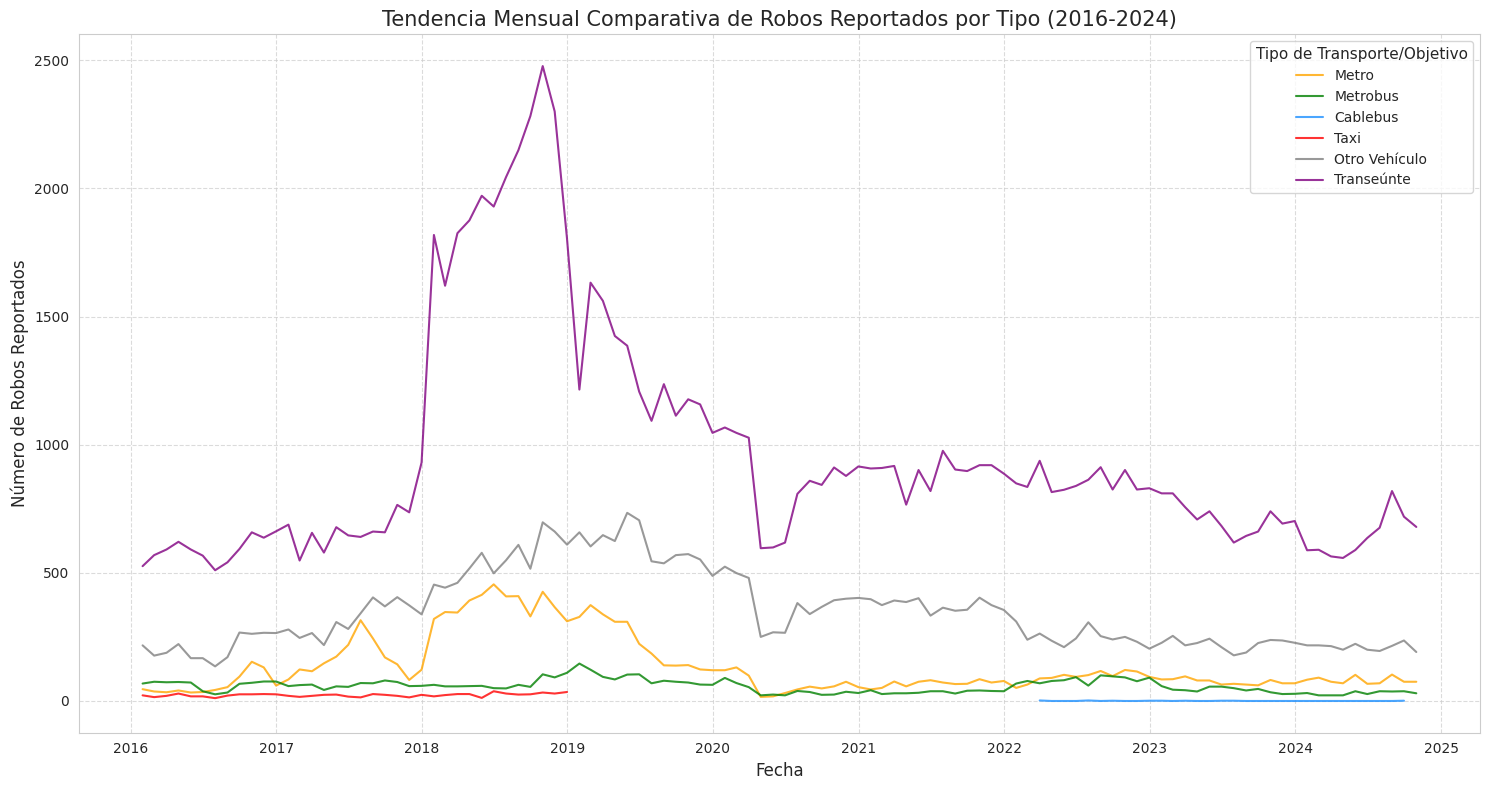

<ipython-input-8-7c7c5c55185d>:72: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_annual = props['df'].set_index('fecha_hora_hecho').resample('Y').size().rename('Num_Robos')
<ipython-input-8-7c7c5c55185d>:72: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_annual = props['df'].set_index('fecha_hora_hecho').resample('Y').size().rename('Num_Robos')
<ipython-input-8-7c7c5c55185d>:72: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_annual = props['df'].set_index('fecha_hora_hecho').resample('Y').size().rename('Num_Robos')
<ipython-input-8-7c7c5c55185d>:72: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_annual = props['df'].set_index('fecha_hora_hecho').resample('Y').size().rename('Num_Robos')
<ipython-input-8-7c7c5c55185d>:72: FutureWarning: 'Y' is deprecated and will

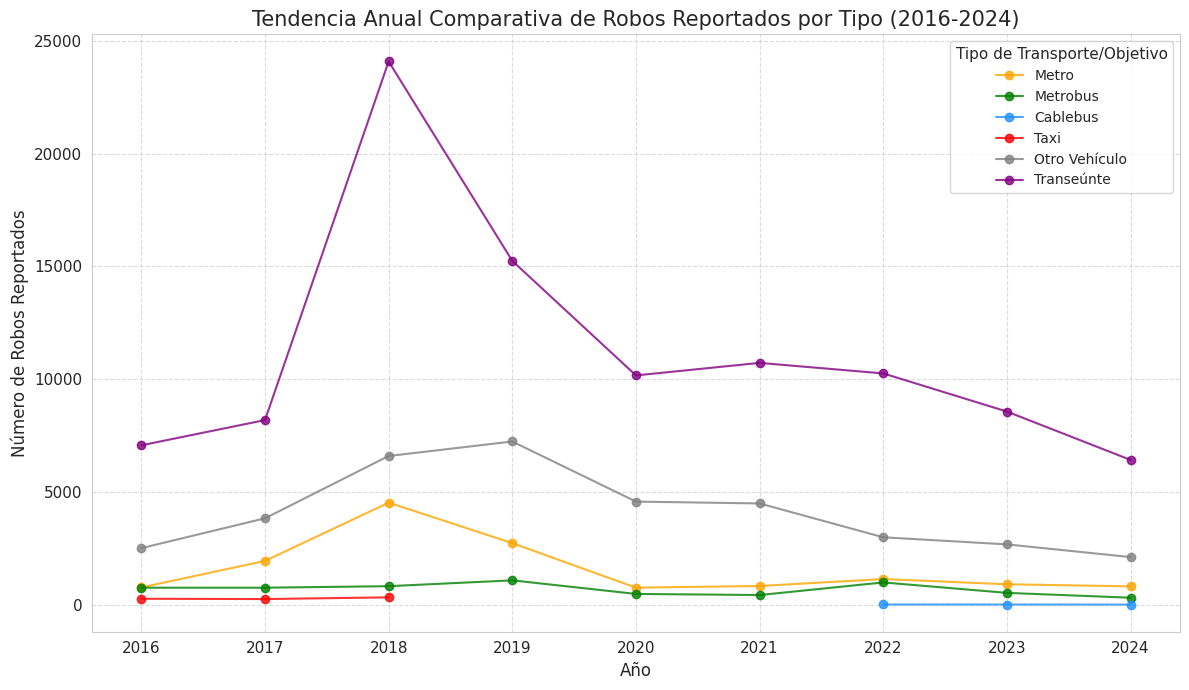


Generando gráficas de patrones temporales detallados comparativos...


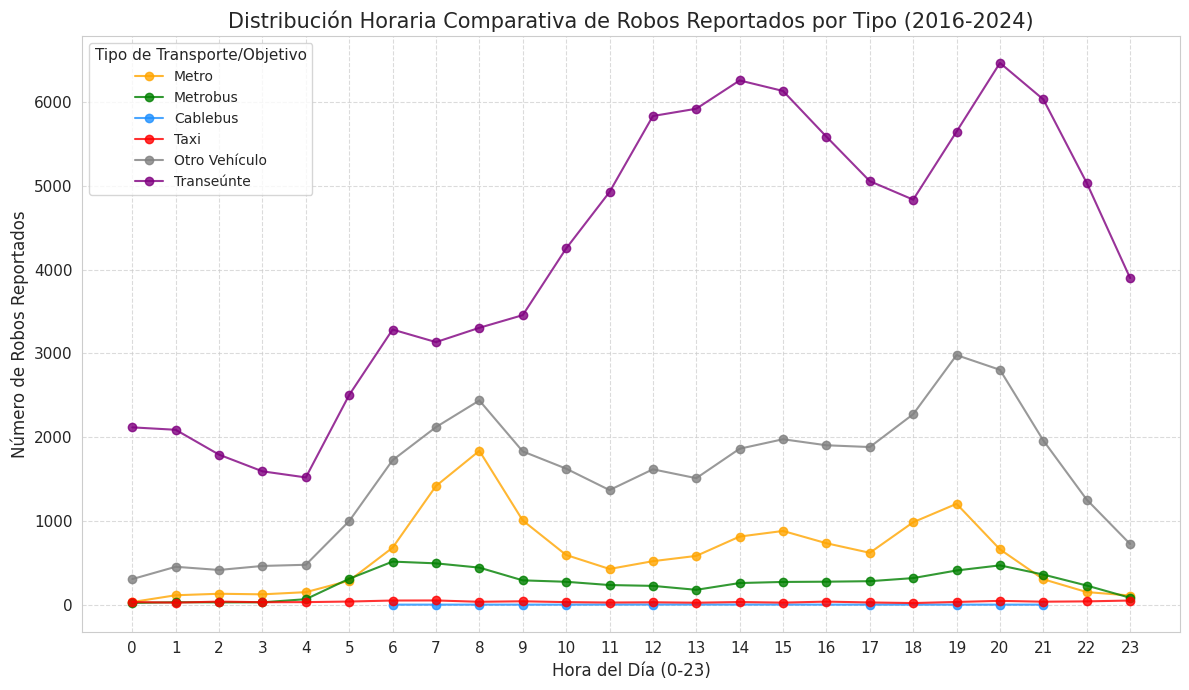

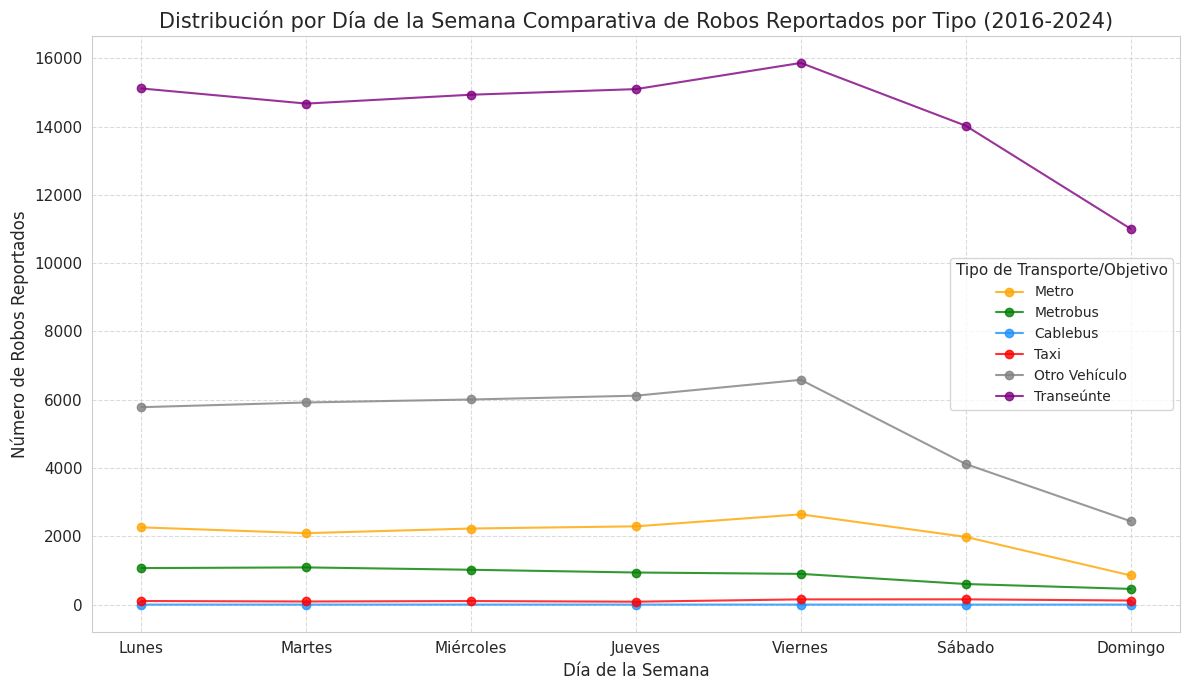

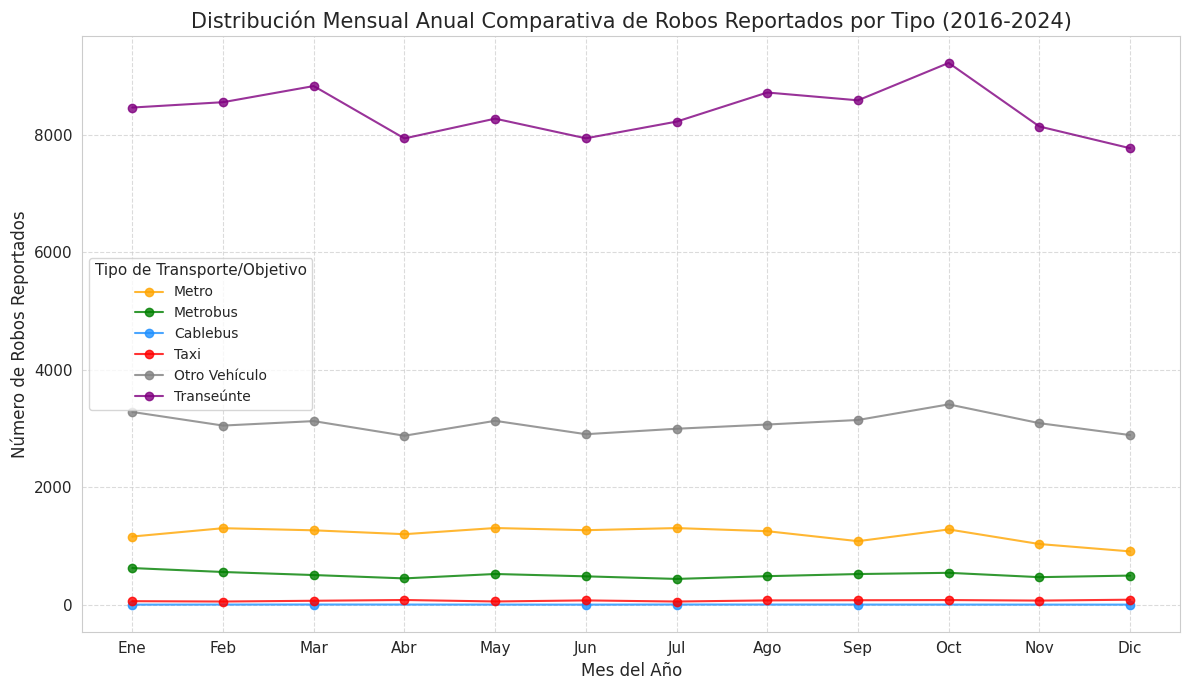


Generando gráfica de comparativa total de robos...


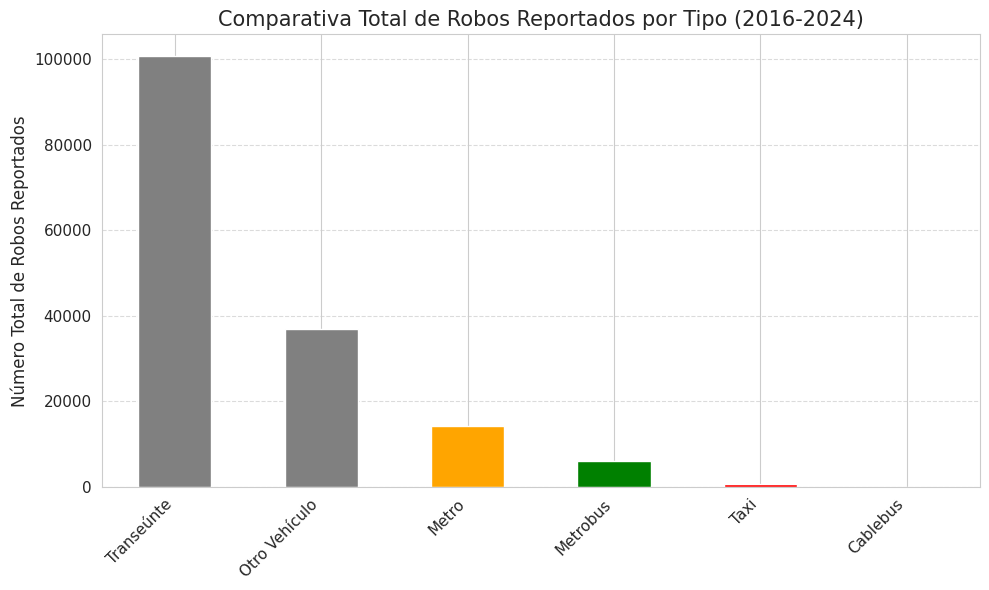


--- Visualizaciones Descriptivas Comparativas Completadas ---


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Asegurarse de importar pandas

# Asumimos que los DataFrames df_metro, df_metrobus, y df_otros_transportes existen y están limpios.
# Y que df_transporte_transeunte_robos también existe con la columna 'transport_mode'.
# Esto depende de la ejecución exitosa del bloque 'Limpieza, Creación de Variables y Filtrado Completados'.

# --- Configuración General para Visualizaciones ---
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 10

# Define los DataFrames y nombres para las categorías que quieres comparar
# Asegúrate de que estos DataFrames fueron creados correctamente en el paso anterior
# y contienen los datos de robo para cada modo.
# También puedes usar df_transporte_transeunte_robos y filtrar por 'transport_mode' dentro de cada sección.

# Crear DataFrames individuales si no los tienes o si es más fácil para este código
# Esto es redundante si ya los creaste antes, pero es para asegurar que existen con los nombres correctos.
df_cablebus = df_transporte_transeunte_robos[df_transporte_transeunte_robos['transport_mode'] == 'Cablebus'].copy()
df_taxi = df_transporte_transeunte_robos[df_transporte_transeunte_robos['transport_mode'] == 'Taxi'].copy()
df_transeunte = df_transporte_transeunte_robos[df_transporte_transeunte_robos['transport_mode'] == 'Transeunte'].copy()
df_otro_vehiculo = df_transporte_transeunte_robos[df_transporte_transeunte_robos['transport_mode'] == 'Otro Vehiculo'].copy()


# Verificar que los DataFrames no estén vacíos antes de intentar obtener min/max de fechas
# Usamos df_transporte_transeunte_robos como base para el periodo, ya que los contiene todos
if not df_transporte_transeunte_robos.empty and 'fecha_hora_hecho' in df_transporte_transeunte_robos.columns:
    min_year = df_transporte_transeunte_robos['fecha_hora_hecho'].dt.year.min()
    max_year = df_transporte_transeunte_robos['fecha_hora_hecho'].dt.year.max()
    period_title = f"({min_year}-{max_year})"
else:
    period_title = "(Periodo de Datos No Disponible)"
    print("Advertencia: df_transporte_transeunte_robos está vacío o no tiene 'fecha_hora_hecho'. El título del periodo podría ser incorrecto.")

print("\n--- Visualizaciones Descriptivas Comparativas ---")

# --- 1. Magnitud y Tendencia General del Robo (Punto 1.1) ---
print("\nGenerando gráficas de tendencia temporal comparativa...")

# Colores y nombres para la leyenda
transport_modes_to_plot = {
    'Metro': {'df': df_metro, 'color': 'orange', 'label': 'Metro'},
    'Metrobus': {'df': df_metrobus, 'color': 'green', 'label': 'Metrobus'},
    'Cablebus': {'df': df_cablebus, 'color': 'dodgerblue', 'label': 'Cablebus'},
    'Taxi': {'df': df_taxi, 'color': 'red', 'label': 'Taxi'},
    'Otro Vehiculo': {'df': df_otro_vehiculo, 'color': 'grey', 'label': 'Otro Vehículo'},
    'Transeunte': {'df': df_transeunte, 'color': 'purple', 'label': 'Transeúnte'}
}

# Tendencia Mensual
plt.figure(figsize=(15, 8))
for mode, props in transport_modes_to_plot.items():
    if not props['df'].empty and 'fecha_hora_hecho' in props['df'].columns:
        df_monthly = props['df'].set_index('fecha_hora_hecho').resample('M').size().rename('Num_Robos')
        plt.plot(df_monthly.index, df_monthly.values, label=props['label'], color=props['color'], alpha=0.8)
    else:
        print(f"Datos no disponibles o DataFrame vacío para {mode} en tendencia mensual.")

plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Número de Robos Reportados', fontsize=12)
plt.title(f'Tendencia Mensual Comparativa de Robos Reportados por Tipo {period_title}', fontsize=15)
plt.legend(title='Tipo de Transporte/Objetivo', fontsize=10, title_fontsize=11)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Tendencia Anual
plt.figure(figsize=(12, 7))
for mode, props in transport_modes_to_plot.items():
    if not props['df'].empty and 'fecha_hora_hecho' in props['df'].columns:
        df_annual = props['df'].set_index('fecha_hora_hecho').resample('Y').size().rename('Num_Robos')
        plt.plot(df_annual.index.year, df_annual.values, marker='o', linestyle='-', label=props['label'], color=props['color'], alpha=0.8)
    else:
        print(f"Datos no disponibles o DataFrame vacío para {mode} en tendencia anual.")

plt.xlabel('Año', fontsize=12)
plt.ylabel('Número de Robos Reportados', fontsize=12)
plt.title(f'Tendencia Anual Comparativa de Robos Reportados por Tipo {period_title}', fontsize=15)
if not df_metro.empty: # Usar un df no vacío para los xticks
    plt.xticks(df_metro.set_index('fecha_hora_hecho').resample('Y').size().index.year, fontsize=11)
else:
    plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.legend(title='Tipo de Transporte/Objetivo', fontsize=10, title_fontsize=11)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# --- 2. Patrones Temporales Detallados (Punto 1.3) ---
print("\nGenerando gráficas de patrones temporales detallados comparativos...")

# Patrón por Hora del Día
plt.figure(figsize=(12, 7))
for mode, props in transport_modes_to_plot.items():
    if not props['df'].empty and 'hour_of_day' in props['df'].columns:
        robberies_by_hour = props['df']['hour_of_day'].value_counts().sort_index()
        plt.plot(robberies_by_hour.index, robberies_by_hour.values, marker='o', linestyle='-', label=props['label'], color=props['color'], alpha=0.8)
    else:
        print(f"Datos no disponibles o DataFrame vacío para {mode} en patrón por hora.")

plt.xlabel('Hora del Día (0-23)', fontsize=12)
plt.ylabel('Número de Robos Reportados', fontsize=12)
plt.title(f'Distribución Horaria Comparativa de Robos Reportados por Tipo {period_title}', fontsize=15)
plt.xticks(range(0, 24), fontsize=11)
plt.yticks(fontsize=11)
plt.legend(title='Tipo de Transporte/Objetivo', fontsize=10, title_fontsize=11)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Patrón por Día de la Semana
plt.figure(figsize=(12, 7))
days_of_week_labels = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
for mode, props in transport_modes_to_plot.items():
    if not props['df'].empty and 'day_of_week' in props['df'].columns:
        robberies_by_day = props['df']['day_of_week'].value_counts().sort_index()
        plt.plot(robberies_by_day.index, robberies_by_day.values, marker='o', linestyle='-', label=props['label'], color=props['color'], alpha=0.8)
    else:
        print(f"Datos no disponibles o DataFrame vacío para {mode} en patrón por día de semana.")

plt.xlabel('Día de la Semana', fontsize=12)
plt.ylabel('Número de Robos Reportados', fontsize=12)
plt.title(f'Distribución por Día de la Semana Comparativa de Robos Reportados por Tipo {period_title}', fontsize=15)
plt.xticks(range(7), days_of_week_labels, fontsize=11)
plt.yticks(fontsize=11)
plt.legend(title='Tipo de Transporte/Objetivo', fontsize=10, title_fontsize=11)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Patrón por Mes del Año
plt.figure(figsize=(12, 7))
months_labels = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
for mode, props in transport_modes_to_plot.items():
    if not props['df'].empty and 'fecha_hora_hecho' in props['df'].columns:
        robberies_by_month = props['df']['fecha_hora_hecho'].dt.month.value_counts().sort_index()
        plt.plot(robberies_by_month.index, robberies_by_month.values, marker='o', linestyle='-', label=props['label'], color=props['color'], alpha=0.8)
    else:
        print(f"Datos no disponibles o DataFrame vacío para {mode} en patrón por mes.")

plt.xlabel('Mes del Año', fontsize=12)
plt.ylabel('Número de Robos Reportados', fontsize=12)
plt.title(f'Distribución Mensual Anual Comparativa de Robos Reportados por Tipo {period_title}', fontsize=15)
plt.xticks(range(1, 13), months_labels, fontsize=11)
plt.yticks(fontsize=11)
plt.legend(title='Tipo de Transporte/Objetivo', fontsize=10, title_fontsize=11)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# --- 3. Distribución Espacial (Punto 1.2 - Parcial: por Alcaldía) ---
# Esta gráfica ya la tienes con las barras agrupadas (la última que hicimos funcionar)
# Solo asegúrate de que la sección que la genera esté presente y use
# df_transporte_transeunte_robos y la columna 'transport_mode' para el pivot_table.


# --- Comparativa de Total de Robos (General) ---
print("\nGenerando gráfica de comparativa total de robos...")
totals = {}
for mode, props in transport_modes_to_plot.items():
    if not props['df'].empty:
        totals[props['label']] = len(props['df'])
    else:
        totals[props['label']] = 0
        print(f"DataFrame vacío para {mode} en comparativa total.")

df_totals = pd.Series(totals).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
df_totals.plot(kind='bar', color=[transport_modes_to_plot.get(mode, {}).get('color', 'grey') for mode in df_totals.index])
plt.ylabel('Número Total de Robos Reportados', fontsize=12)
plt.title(f'Comparativa Total de Robos Reportados por Tipo {period_title}', fontsize=15)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- Perfil del Delito (con/sin violencia) - SUGERENCIA ---
# Este es el código que discutimos para añadir después de que crees la columna 'modalidad_violencia'
# print("\nGenerando gráfica de proporción con/sin violencia (ejemplo para Metro)...")
# if not df_metro.empty and 'modalidad_violencia' in df_metro.columns:
#     plt.figure(figsize=(6,6))
#     df_metro['modalidad_violencia'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue', 'lightgrey'])
#     plt.ylabel('')
#     plt.title(f'Proporción de Robos en Metro por Modalidad de Violencia {period_title}', fontsize=14)
#     plt.show()
# else:
#     print("Datos no disponibles o columna 'modalidad_violencia' no creada para el gráfico de violencia en Metro.")


print("\n--- Visualizaciones Descriptivas Comparativas Completadas ---")


--- Visualización Horaria Comparativa (Enfocada en Transporte Masivo) ---


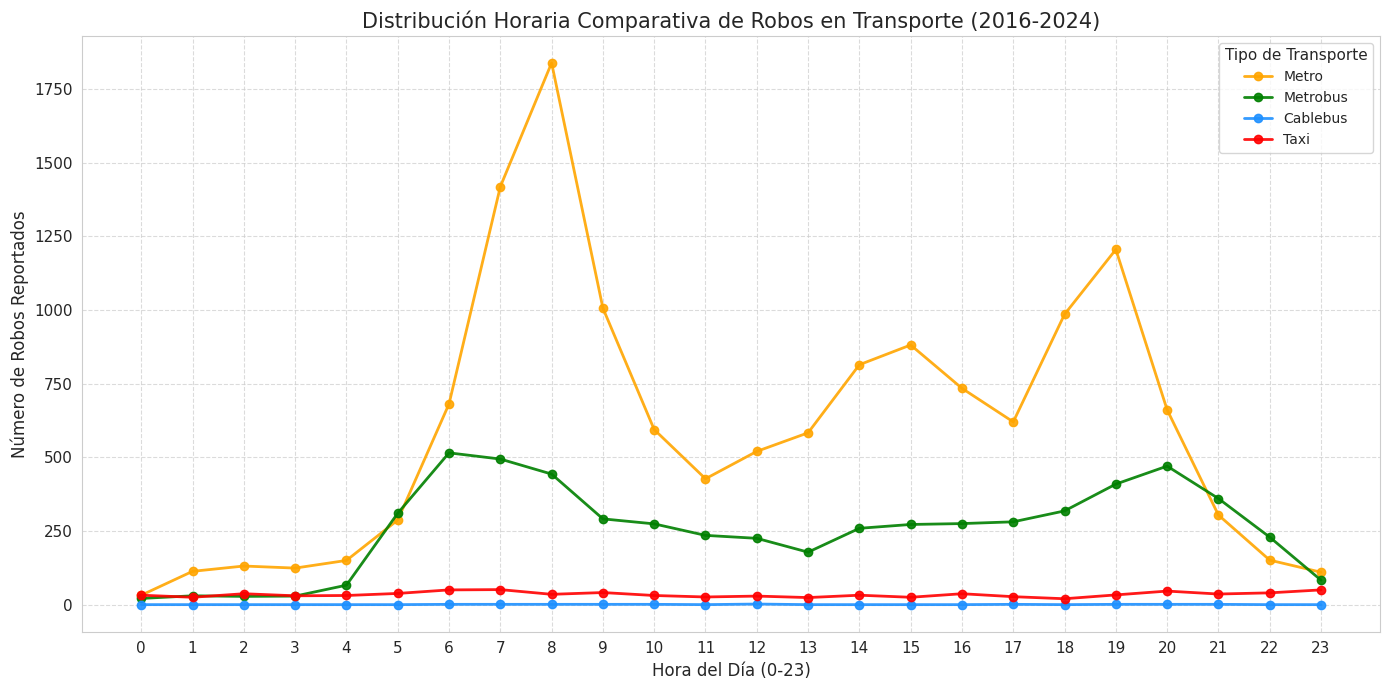


--- Tendencia Mensual Comparativa (Enfocada en Transporte Masivo) ---


<ipython-input-9-949ec3ebd1a6>:69: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = props['df'].set_index('fecha_hora_hecho').resample('M').size().rename('Num_Robos')
<ipython-input-9-949ec3ebd1a6>:69: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = props['df'].set_index('fecha_hora_hecho').resample('M').size().rename('Num_Robos')
<ipython-input-9-949ec3ebd1a6>:69: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = props['df'].set_index('fecha_hora_hecho').resample('M').size().rename('Num_Robos')
<ipython-input-9-949ec3ebd1a6>:69: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = props['df'].set_index('fecha_hora_hecho').resample('M').size().rename('Num_Robos')


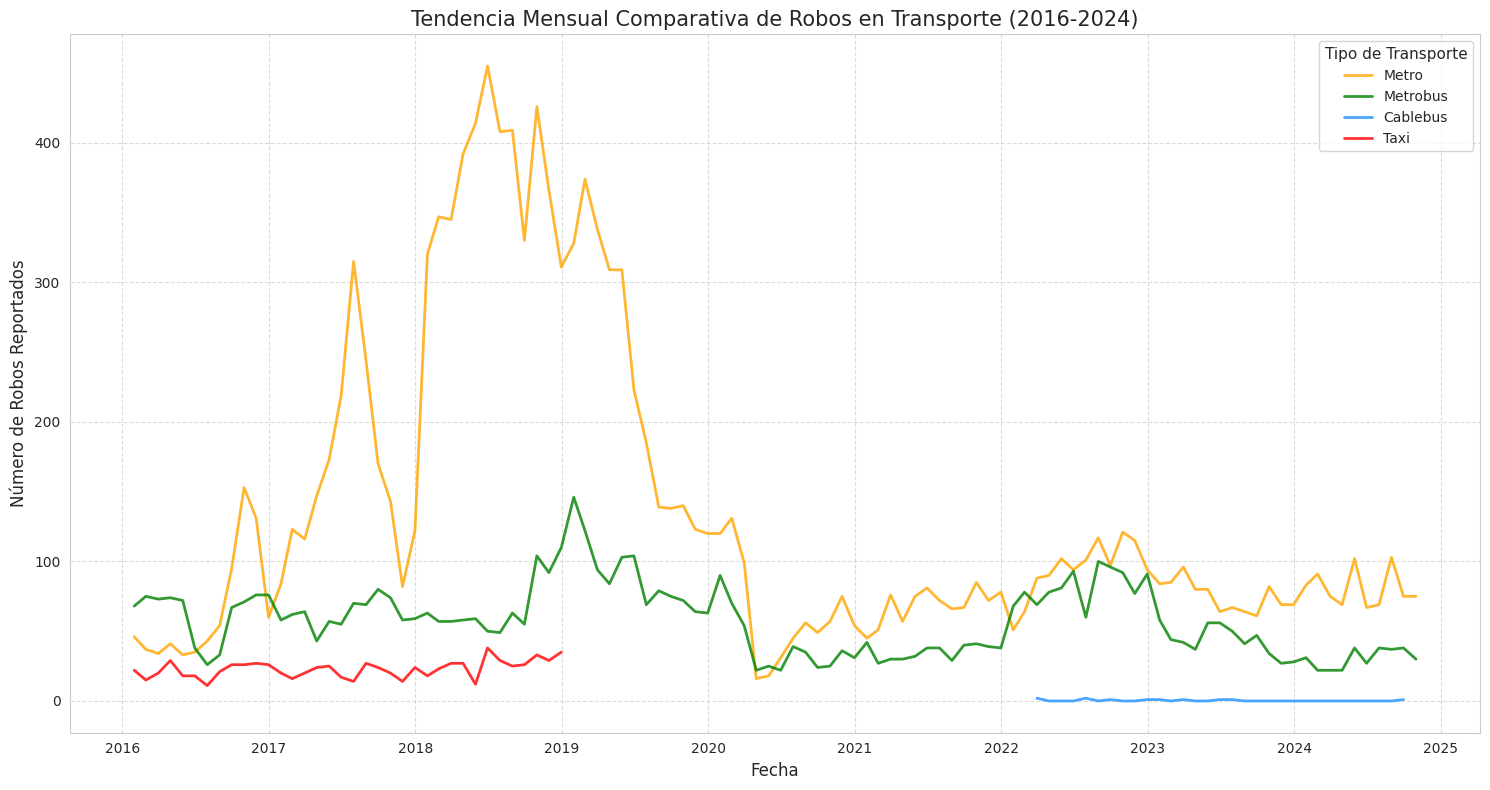

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Asumimos que los DataFrames df_metro, df_metrobus, df_cablebus, df_taxi existen y están limpios.
# Esto depende de la ejecución exitosa del bloque 'Limpieza, Creación de Variables y Filtrado Completados'.

# --- Configuración General para Visualizaciones ---
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 10

# Usamos df_transporte_transeunte_robos como base para el periodo, ya que los contiene todos
if not df_transporte_transeunte_robos.empty and 'fecha_hora_hecho' in df_transporte_transeunte_robos.columns:
    min_year = df_transporte_transeunte_robos['fecha_hora_hecho'].dt.year.min()
    max_year = df_transporte_transeunte_robos['fecha_hora_hecho'].dt.year.max()
    period_title = f"({min_year}-{max_year})"
else:
    period_title = "(Periodo de Datos No Disponible)"
    print("Advertencia: df_transporte_transeunte_robos está vacío o no tiene 'fecha_hora_hecho'. El título del periodo podría ser incorrecto.")

print("\n--- Visualización Horaria Comparativa (Enfocada en Transporte Masivo) ---")

# Colores y nombres para la leyenda (AHORA EXCLUYENDO Transeunte y Otro Vehiculo)
transport_modes_focused = {
    'Metro': {'df': df_metro, 'color': 'orange', 'label': 'Metro'},
    'Metrobus': {'df': df_metrobus, 'color': 'green', 'label': 'Metrobus'},
    'Cablebus': {'df': df_cablebus, 'color': 'dodgerblue', 'label': 'Cablebus'},
    'Taxi': {'df': df_taxi, 'color': 'red', 'label': 'Taxi'}
    # 'Otro Vehiculo' y 'Transeunte' se omiten aquí
}

# Patrón por Hora del Día (Enfocado)
plt.figure(figsize=(14, 7)) # Ajustar tamaño si es necesario
all_empty = True # Bandera para saber si se ploteó algo

for mode, props in transport_modes_focused.items():
    if not props['df'].empty and 'hour_of_day' in props['df'].columns:
        robberies_by_hour = props['df']['hour_of_day'].value_counts().sort_index()
        # Asegurarse de que el índice cubra todas las horas de 0 a 23 para un ploteo completo
        robberies_by_hour = robberies_by_hour.reindex(range(24), fill_value=0)
        plt.plot(robberies_by_hour.index, robberies_by_hour.values, marker='o', linestyle='-', label=props['label'], color=props['color'], alpha=0.9, linewidth=2)
        all_empty = False # Se ploteó al menos una línea
    else:
        print(f"Datos no disponibles o DataFrame vacío para {mode} en patrón por hora.")

if all_empty:
    print("No hay datos para graficar para los modos de transporte seleccionados.")
else:
    plt.xlabel('Hora del Día (0-23)', fontsize=12)
    plt.ylabel('Número de Robos Reportados', fontsize=12)
    plt.title(f'Distribución Horaria Comparativa de Robos en Transporte {period_title}', fontsize=15)
    plt.xticks(range(0, 24), fontsize=11)
    plt.yticks(fontsize=11)
    plt.legend(title='Tipo de Transporte', fontsize=10, title_fontsize=11)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# --- Aquí podrías repetir la misma lógica para las otras gráficas ---
# (Tendencia Mensual, Tendencia Anual, Por Día de la Semana)
# Simplemente usando el diccionario `transport_modes_focused` en lugar de `transport_modes_to_plot`.

# Ejemplo para Tendencia Mensual (Enfocada)
print("\n--- Tendencia Mensual Comparativa (Enfocada en Transporte Masivo) ---")
plt.figure(figsize=(15, 8))
all_empty_monthly = True
for mode, props in transport_modes_focused.items():
    if not props['df'].empty and 'fecha_hora_hecho' in props['df'].columns:
        df_monthly = props['df'].set_index('fecha_hora_hecho').resample('M').size().rename('Num_Robos')
        plt.plot(df_monthly.index, df_monthly.values, label=props['label'], color=props['color'], alpha=0.8, linewidth=2)
        all_empty_monthly = False
    else:
        print(f"Datos no disponibles o DataFrame vacío para {mode} en tendencia mensual.")

if not all_empty_monthly:
    plt.xlabel('Fecha', fontsize=12)
    plt.ylabel('Número de Robos Reportados', fontsize=12)
    plt.title(f'Tendencia Mensual Comparativa de Robos en Transporte {period_title}', fontsize=15)
    plt.legend(title='Tipo de Transporte', fontsize=10, title_fontsize=11)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("No hay datos para graficar la tendencia mensual de los modos de transporte seleccionados.")

## Feature engineering

### Subtask:
Feature Engineering for Robbery Prediction


**Reasoning**:
Create time-based, location-based, and potentially aggregated features for robbery prediction.  Handle the categorical `alcaldia_hecho` feature using one-hot encoding. Document the limitations due to missing geographical coordinate data.



In [10]:
# Asumiendo que df ya ha sido cargado y limpiado como en las celdas anteriores
# La columna 'fecha_hora_hecho' ya debería existir y ser de tipo datetime desde el paso de limpieza.

# Convert 'fecha_hecho' to datetime if it wasn't already successfully converted
# This is a safeguard, as it should have been done in the cleaning step
# COMMENTED OUT: The original 'fecha_hecho' column might not exist anymore.
# We will use 'fecha_hora_hecho' instead.
# df['fecha_hecho'] = pd.to_datetime(df['fecha_hecho'], errors='coerce')

# Handle missing values in 'fecha_hecho' after conversion
# COMMENTED OUT: This is no longer needed if we use 'fecha_hora_hecho'.
# df.dropna(subset=['fecha_hecho'], inplace=True)


# Create 'day_of_week' feature using 'fecha_hora_hecho'
# .dt.dayofweek returns Monday=0, Sunday=6
df['day_of_week'] = df['fecha_hora_hecho'].dt.dayofweek

# Create 'hour_of_day' feature using 'fecha_hora_hecho'
# Access the hour directly from the datetime column
df['hour_of_day'] = df['fecha_hora_hecho'].dt.hour

# Handle missing values in 'fecha_hora_hecho' and subsequently created features
# This dropna should ideally happen earlier in the cleaning step, but as a safeguard:
df.dropna(subset=['fecha_hora_hecho', 'day_of_week', 'hour_of_day'], inplace=True)


# Time-Based Features
df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)
# Note: Holiday data for Mexico City is not available, so holiday features cannot be created.

# Define rush hour periods
df['is_morning_rush'] = ((df['hour_of_day'] >= 7) & (df['hour_of_day'] <= 9)).astype(int)
df['is_evening_rush'] = ((df['hour_of_day'] >= 18) & (df['hour_of_day'] <= 20)).astype(int)

# Location-Based Features
# One-hot encode 'alcaldia_hecho'
# Check if 'alcaldia_hecho' exists and is not null
if 'alcaldia_hecho' in df.columns and not df['alcaldia_hecho'].isnull().all():
    alcaldia_dummies = pd.get_dummies(df['alcaldia_hecho'], prefix='alcaldia')
    # Avoid concatenating if dummies is empty
    if not alcaldia_dummies.empty:
        df = pd.concat([df, alcaldia_dummies], axis=1)
    else:
         print("Warning: 'alcaldia_hecho' column is empty or contains only NaN after filtering. No alcaldia dummies created.")

else:
    print("Warning: 'alcaldia_hecho' column not found or is entirely null. No alcaldia dummies created.")


# Note: Geographic coordinates ('latitud' and 'longitud') have significant missing values (around 5%)
# and may be unreliable.  Proximity features cannot be reliably created.

# Aggregated Features (Optional - skipped due to computational intensity)
# Note: The aggregation features are skipped due to their computational intensity, which can slow down
# the execution time.  If more time is available, it could be tried again.

# Display the updated DataFrame
display(df.head())

# Now, ensure that the subsequent code blocks that use df_metro and df_metrobus
# are re-executed to ensure they are based on the df with the new features.
# For example, the data wrangling block that defines df_metro and df_metrobus
# (or the visualization blocks that filter df_metro/df_metrobus) should be run again.

,fecha_hora_hecho,anio_hecho,mes_hecho,hora_hecho,delito,categoria_delito,alcaldia_hecho,colonia_hecho,alcaldia,latitud,...,alcaldia_GUSTAVO A. MADERO,alcaldia_IZTACALCO,alcaldia_IZTAPALAPA,alcaldia_LA MAGDALENA CONTRERAS,alcaldia_MIGUEL HIDALGO,alcaldia_MILPA ALTA,alcaldia_TLAHUAC,alcaldia_TLALPAN,alcaldia_VENUSTIANO CARRANZA,alcaldia_XOCHIMILCO
2,2016-01-01 00:20:00,2016.0,Enero,00:20,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,IZTAPALAPA,SAN ANTONIO CULHUACÁN,IZTAPALAPA,19.34080,...,False,False,True,False,False,False,False,False,False,False
10,2016-01-01 01:45:00,2016.0,Enero,01:45,LESIONES CULPOSAS POR TRANSITO VEHICULAR EN CO...,DELITO DE BAJO IMPACTO,IZTAPALAPA,CERRO DE LA ESTRELLA,IZTAPALAPA,19.31861,...,False,False,True,False,False,False,False,False,False,False
12,2016-01-01 01:15:00,2016.0,Enero,01:15,DAÑO EN PROPIEDAD AJENA INTENCIONAL A AUTOMOVIL,DELITO DE BAJO IMPACTO,MIGUEL HIDALGO,POPOTLA,MIGUEL HIDALGO,19.45716,...,False,False,False,False,True,False,False,False,False,False
15,2016-01-01 01:30:00,2016.0,Enero,01:30,ROBO A CASA HABITACION SIN VIOLENCIA,DELITO DE BAJO IMPACTO,COYOACAN,LOS CEDROS,COYOACAN,19.31267,...,False,False,False,False,False,False,False,False,False,False
16,2016-01-01 02:00:00,2016.0,Enero,02:00,DAÑO EN PROPIEDAD AJENA INTENCIONAL A NEGOCIO,DELITO DE BAJO IMPACTO,AZCAPOTZALCO,SANTA MARIA MALINALCO,AZCAPOTZALCO,19.47936,...,False,False,False,False,False,False,False,False,False,False


## Data visualization

### Subtask:
Visualize the key findings from the data analysis.


**Reasoning**:
Visualize the key findings from the data analysis by generating the plots as instructed.



<ipython-input-11-875f1a440fba>:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_metro_monthly_viz = df_metro_viz.set_index('fecha_hora_hecho').resample('M').size()
<ipython-input-11-875f1a440fba>:43: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_metrobus_monthly_viz = df_metrobus_viz.set_index('fecha_hora_hecho').resample('M').size()


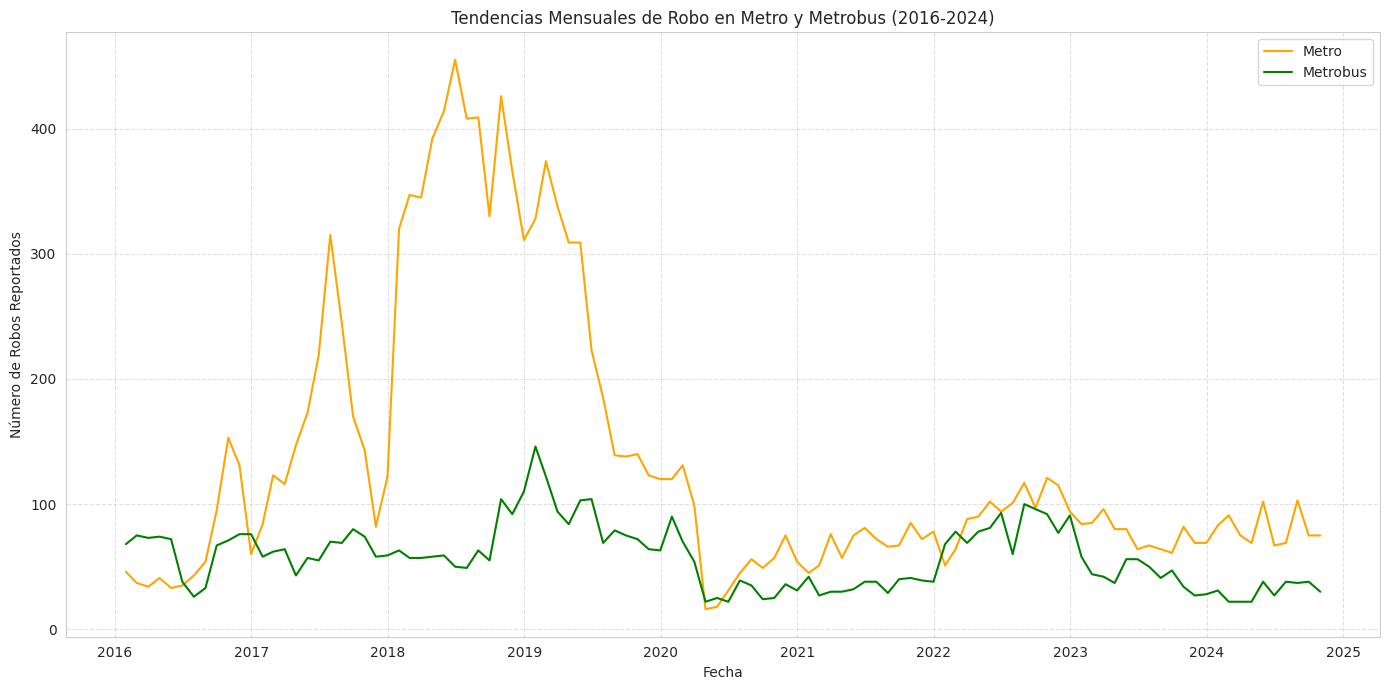

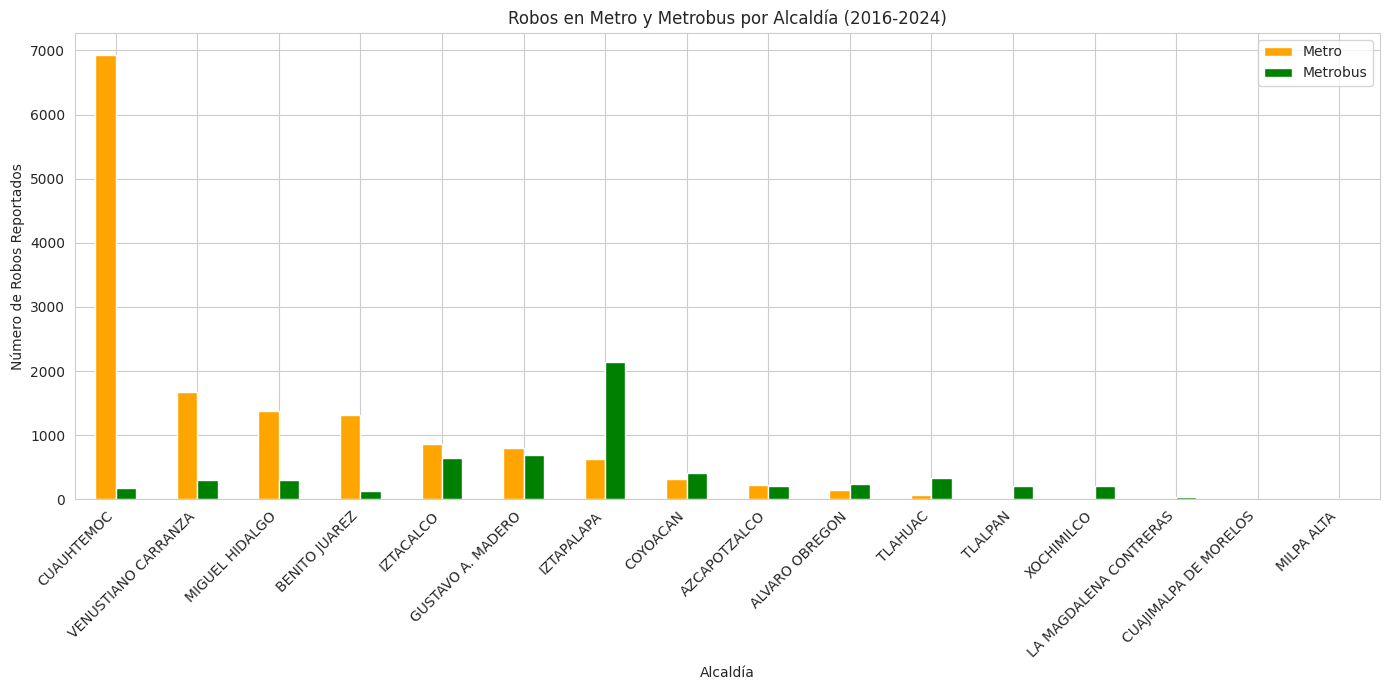

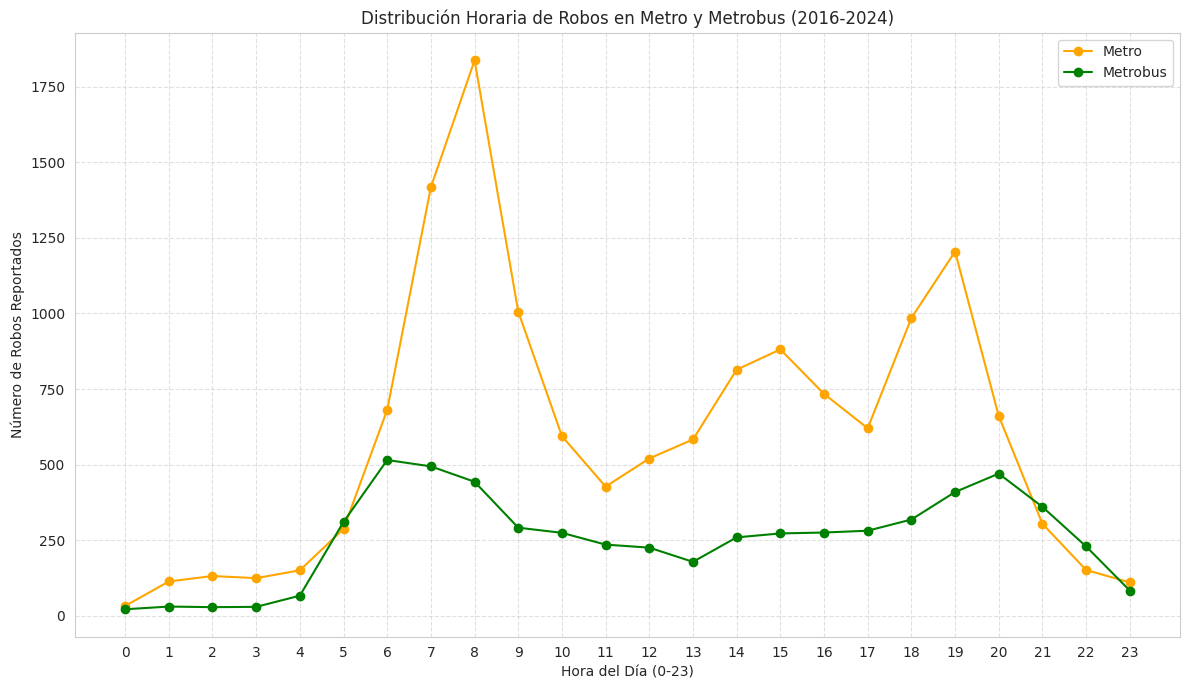

In [11]:
# CELDA 5: Visualizaciones Descriptivas (Adaptado de tu segundo bloque)

import matplotlib.pyplot as plt
import seaborn as sns # Asegúrate de importar seaborn si no lo hiciste antes

# Asumimos que df_metro y df_metrobus existen y tienen las columnas
# 'fecha_hora_hecho', 'hour_of_day', 'alcaldia' desde la Celda 4.

# --- Configuración General para Visualizaciones ---
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Define el rango de fechas que te interesa (si quieres un subconjunto del periodo 2016+)
# Si quieres usar todos los datos desde 2016, puedes omitir este filtro.
# start_date_filter = '2018-01-01' # Ejemplo
# end_date_filter = '2023-12-31'   # Ejemplo

# Crear DataFrames filtrados por fecha SI ES NECESARIO para este análisis específico
# Si no, usa df_metro y df_metrobus directamente
# df_metro_viz = df_metro[(df_metro['fecha_hora_hecho'] >= start_date_filter) & (df_metro['fecha_hora_hecho'] <= end_date_filter)].copy()
# df_metrobus_viz = df_metrobus[(df_metrobus['fecha_hora_hecho'] >= start_date_filter) & (df_metrobus['fecha_hora_hecho'] <= end_date_filter)].copy()

# Para este ejemplo, usaremos los DataFrames completos (df_metro, df_metrobus)
# que ya fueron filtrados para >= 2016 en la Celda 4.
df_metro_viz = df_metro.copy()
df_metrobus_viz = df_metrobus.copy()


# Periodo para títulos (basado en los datos que se van a graficar)
if not df_metro_viz.empty:
    min_year_viz = df_metro_viz['fecha_hora_hecho'].dt.year.min()
    max_year_viz = df_metro_viz['fecha_hora_hecho'].dt.year.max()
    period_title_viz = f"({min_year_viz}-{max_year_viz})"
else:
    period_title_viz = "(Datos de Metro no disponibles)"


# 1. Frecuencia de Robos en el Tiempo
if not df_metro_viz.empty:
    df_metro_monthly_viz = df_metro_viz.set_index('fecha_hora_hecho').resample('M').size()
if not df_metrobus_viz.empty:
    df_metrobus_monthly_viz = df_metrobus_viz.set_index('fecha_hora_hecho').resample('M').size()

plt.figure(figsize=(14, 7))
if not df_metro_viz.empty:
    plt.plot(df_metro_monthly_viz.index, df_metro_monthly_viz.values, label='Metro', color='orange')
if not df_metrobus_viz.empty:
    plt.plot(df_metrobus_monthly_viz.index, df_metrobus_monthly_viz.values, label='Metrobus', color='green')
plt.xlabel('Fecha')
plt.ylabel('Número de Robos Reportados')
plt.title(f'Tendencias Mensuales de Robo en Metro y Metrobus {period_title_viz}')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# (Puedes añadir las gráficas diarias y semanales aquí si las necesitas, usando la misma lógica)

# 2. Distribución Espacial (Alcaldías)
# Usaremos el código de barras agrupadas que ya funcionó.
# Asegúrate de que df_transporte_transeunte_robos existe de la Celda 4 y tiene las columnas
# 'alcaldia' y 'transport_mode'.
# Este gráfico ya compara Metro, Metrobus, Taxi, Cablebus, etc.

# (Aquí iría el código de la gráfica de barras agrupadas por alcaldía que ya tienes y funciona)
# Si solo quieres mostrar Metro y Metrobus en este gráfico específico:
if not df_metro_viz.empty or not df_metrobus_viz.empty:
    alcaldia_comp_data = {}
    if not df_metro_viz.empty:
        alcaldia_comp_data['Metro'] = df_metro_viz['alcaldia'].value_counts()
    if not df_metrobus_viz.empty:
        alcaldia_comp_data['Metrobus'] = df_metrobus_viz['alcaldia'].value_counts()

    df_alcaldia_comparison_simple = pd.DataFrame(alcaldia_comp_data).fillna(0)
    if not df_alcaldia_comparison_simple.empty:
        if 'Metro' in df_alcaldia_comparison_simple.columns:
             df_alcaldia_comparison_simple = df_alcaldia_comparison_simple.sort_values(by='Metro', ascending=False)

        df_alcaldia_comparison_simple.plot(kind='bar', figsize=(14, 7), color=['orange', 'green'])
        plt.xlabel('Alcaldía')
        plt.ylabel('Número de Robos Reportados')
        plt.title(f'Robos en Metro y Metrobus por Alcaldía {period_title_viz}')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()


# 3. Horas Pico
if not df_metro_viz.empty:
    metro_robberies_by_hour_viz = df_metro_viz['hour_of_day'].value_counts().sort_index().reindex(range(24), fill_value=0)
if not df_metrobus_viz.empty:
    metrobus_robberies_by_hour_viz = df_metrobus_viz['hour_of_day'].value_counts().sort_index().reindex(range(24), fill_value=0)

plt.figure(figsize=(12, 7))
if not df_metro_viz.empty:
    plt.plot(metro_robberies_by_hour_viz.index, metro_robberies_by_hour_viz.values, label='Metro', color='orange', marker='o')
if not df_metrobus_viz.empty:
    plt.plot(metrobus_robberies_by_hour_viz.index, metrobus_robberies_by_hour_viz.values, label='Metrobus', color='green', marker='o')
plt.xlabel('Hora del Día (0-23)')
plt.ylabel('Número de Robos Reportados')
plt.title(f'Distribución Horaria de Robos en Metro y Metrobus {period_title_viz}')
plt.xticks(range(0,24))
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Número total de alcaldías únicas en df_metro: 16
Conteo de robos por alcaldía (primeras 10):
alcaldia_hecho
CUAUHTEMOC             6927
VENUSTIANO CARRANZA    1677
MIGUEL HIDALGO         1381
BENITO JUAREZ          1318
IZTACALCO               867
GUSTAVO A. MADERO       806
IZTAPALAPA              628
COYOACAN                320
AZCAPOTZALCO            222
ALVARO OBREGON          139
Name: is_metro_robo, dtype: int64


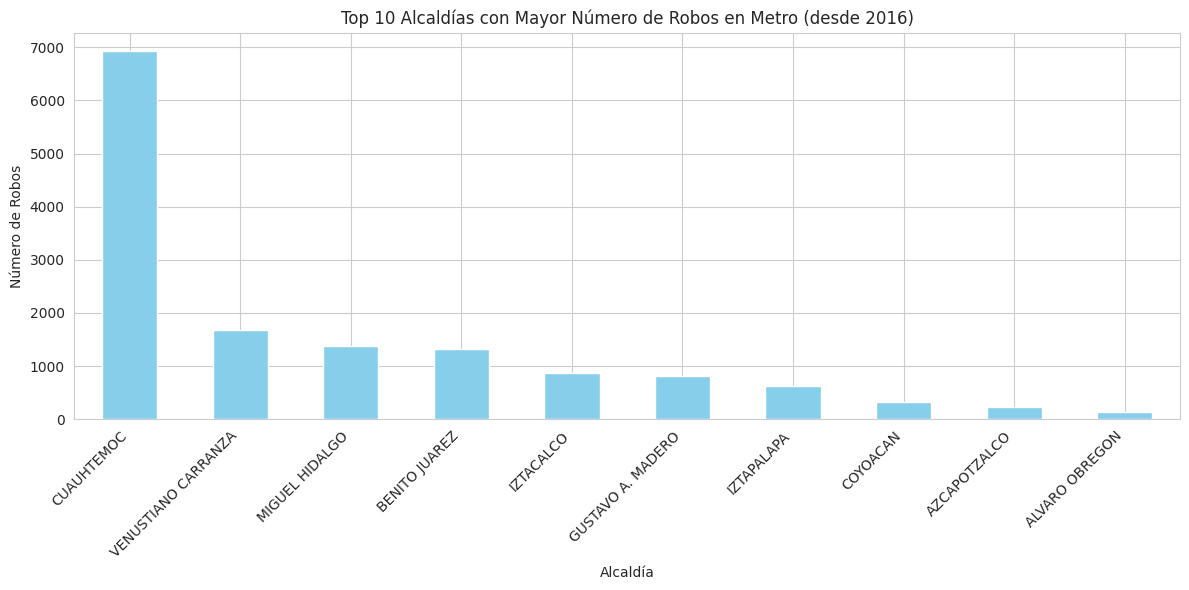

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Asegúrate de que df_metro está definido en tu notebook
# Si no lo está, carga tus datos y filtra por el rango de fechas deseado.

# 2. Spatial Distribution (Metro) - Filtrado
plt.figure(figsize=(12, 6))

# Agrupar los datos por alcaldía y sumar los robos
# We use the already defined df_metro DataFrame
# CHANGE: Replaced 'df_metro_filtered' with 'df_metro'
robberies_by_alcaldia = df_metro.groupby('alcaldia_hecho')['is_metro_robo'].sum()

# Ordenar las alcaldías de forma descendente por el número total de robos
robberies_by_alcaldia_sorted = robberies_by_alcaldia.sort_values(ascending=False)

# --- Pasos de diagnóstico ---
# We use df_metro to check unique alcaldias
print("Número total de alcaldías únicas en df_metro:", df_metro['alcaldia_hecho'].nunique())
print("Conteo de robos por alcaldía (primeras 10):")
print(robberies_by_alcaldia_sorted.head(10))
# ----------------------------

# Seleccionar las 10 alcaldías con más robos
top_10_alcaldias = robberies_by_alcaldia_sorted.head(10)

# Crear el gráfico de barras con las 10 alcaldías principales
top_10_alcaldias.plot(kind='bar', color='skyblue')

# Adjusting title to reflect using df_metro (which was filtered >= 2016)
# You might want to add the actual date range from df_metro if needed
plt.xlabel('Alcaldía')
plt.ylabel('Número de Robos')
plt.title('Top 10 Alcaldías con Mayor Número de Robos en Metro (desde 2016)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Summary:

### Q&A
This analysis aimed to understand robbery trends in Mexico City's Metro and Metrobus systems. Due to a lack of precise location data for stations, the analysis relied on an assumption linking the borough of the incident (`alcaldia_hecho`) to the transportation mode.  This introduces uncertainty, and the results should be interpreted cautiously.  The analysis revealed temporal patterns, geographical hotspots within the Metro system (using alcaldías as a proxy), and peak robbery hours, allowing for comparison between the two transportation systems.  The total number of robberies in the Metro was significantly higher than in the Metrobus.

### Data Analysis Key Findings
* **Data Quality Issues:** The dataset had missing values, particularly in location-related columns, and inconsistencies in date/time formats.  The 'fecha\_hecho' column contained invalid dates, leading to missing values after conversion to datetime.
* **Robbery Trends:**  Robberies showed variations across different days of the week and hours of the day, with certain alcaldías exhibiting higher concentrations of incidents.  The analysis identified peak hours for robberies in both Metro and Metrobus.
* **Metro vs. Metrobus:** The total number of robberies recorded for the Metro was substantially higher than for the Metrobus.
* **Location Limitation:** The analysis relied on the `alcaldia_hecho` column as a proxy for Metro/Metrobus locations due to the absence of precise station data. This introduces uncertainty in the results.
* **Temporal Patterns:**  Robbery frequencies displayed daily, weekly, and monthly variations, suggesting potential temporal patterns.

### Insights or Next Steps
* **Improve Location Data:** Obtain more precise location data (e.g., station names or GPS coordinates) to refine the analysis and reduce reliance on the less accurate `alcaldia_hecho` column.
* **Investigate External Factors:** Explore correlations between robbery counts and external factors such as holidays, special events, or socioeconomic indicators to gain a deeper understanding of the underlying causes.


In [13]:
print("Valores únicos en la columna 'delito':")
print(df['delito'].unique())

print("\nValores únicos en la columna 'categoria_delito':")
# Asegúrate de que 'categoria_delito' es el nombre correcto de la columna de categorías
# Si el nombre es diferente, cámbialo aquí.
if 'categoria_delito' in df.columns:
  print(df['categoria_delito'].unique())
else:
  print("Columna 'categoria_delito' no encontrada. Por favor, verifica el nombre correcto de la columna de categorías.")

print("\nConteo de valores para 'delito' (los 20 más frecuentes):")
print(df['delito'].value_counts().head(20))

# Para buscar modalidades de transporte dentro de las descripciones de delito o categoría
# Puedes buscar palabras clave como 'METRO', 'METROBUS', 'TAXI', 'AUTOBUS', etc.

print("\nBuscando modalidades de transporte en la columna 'delito':")
transporte_delito = df['delito'].str.contains('METRO|METROBUS|TAXI|AUTOBUS|TRANVIA', case=False, na=False)
print(df[transporte_delito]['delito'].unique())

if 'categoria_delito' in df.columns:
    print("\nBuscando modalidades de transporte en la columna 'categoria_delito':")
    transporte_categoria = df['categoria_delito'].str.contains('METRO|METROBUS|TAXI|AUTOBUS|TRANVIA', case=False, na=False)
    print(df[transporte_categoria]['categoria_delito'].unique())

Valores únicos en la columna 'delito':
['ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA'
 'LESIONES CULPOSAS POR TRANSITO VEHICULAR EN COLISION'
 'DAÑO EN PROPIEDAD AJENA INTENCIONAL A AUTOMOVIL'
 'ROBO A CASA HABITACION SIN VIOLENCIA'
 'DAÑO EN PROPIEDAD AJENA INTENCIONAL A NEGOCIO'
 'ROBO A NEGOCIO CON VIOLENCIA' 'LESIONES INTENCIONALES POR ARMA DE FUEGO'
 'DENUNCIA DE HECHOS'
 'DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO VEHICULAR A AUTOMOVIL'
 'ROBO DE OBJETOS' 'FRAUDE' 'DAÑO EN PROPIEDAD AJENA INTENCIONAL'
 'DAÑO EN PROPIEDAD AJENA CULPOSA'
 'ROBO A PASAJERO / CONDUCTOR DE VEHICULO CON VIOLENCIA'
 'LESIONES INTENCIONALES POR GOLPES' 'ROBO A NEGOCIO SIN VIOLENCIA'
 'ROBO DE ACCESORIOS DE AUTO' 'CONTRA FUNCIONARIOS PUBLICOS'
 'PERDIDA DE LA VIDA POR SUICIDIO'
 'LESIONES INTENCIONALES POR ARMA BLANCA' 'HOMICIDIO POR ARMA DE FUEGO'
 'DAÑO EN PROPIEDAD AJENA INTENCIONAL A BIENES INMUEBLES'
 'PERDIDA DE LA VIDA POR PARO CARDIACO' 'NEGACION DEL SERVICIO PUBLICO'
 'RESISTENCIA DE PARTICU

## Carga de datos de afluencia como variable regresora

In [14]:
print("\n--- Cargando y Procesando Datos de Afluencia del Metro ---")
AFLUENCIA_CSV_PATH = '/content/drive/MyDrive/PP_Robo_Metro_CDMX/Nootebooks/Afluencia_metro-2025-05-18.csv'
df_afluencia_diaria_total = None # Inicializar
try:
    df_afluencia_raw = pd.read_csv(AFLUENCIA_CSV_PATH, encoding='UTF-8')
    print("Datos de afluencia raw cargados.")
    DATE_COL_AFLUENCIA = 'fecha'
    COUNT_COL_AFLUENCIA = 'afluencia'

    if DATE_COL_AFLUENCIA in df_afluencia_raw.columns and COUNT_COL_AFLUENCIA in df_afluencia_raw.columns:
        df_afluencia_raw['ds'] = pd.to_datetime(df_afluencia_raw[DATE_COL_AFLUENCIA], errors='coerce')
        df_afluencia_raw[COUNT_COL_AFLUENCIA] = pd.to_numeric(df_afluencia_raw[COUNT_COL_AFLUENCIA], errors='coerce')
        df_afluencia_raw.dropna(subset=['ds', COUNT_COL_AFLUENCIA], inplace=True)

        df_afluencia_diaria_total = df_afluencia_raw.groupby('ds')[COUNT_COL_AFLUENCIA].sum().reset_index()
        df_afluencia_diaria_total = df_afluencia_diaria_total.rename(columns={COUNT_COL_AFLUENCIA: 'afluencia'})
        print("\nAfluencia diaria total del sistema procesada.")
        display(df_afluencia_diaria_total.head())
    else:
        print(f"Error: Columnas requeridas ('{DATE_COL_AFLUENCIA}', '{COUNT_COL_AFLUENCIA}') no encontradas en datos de afluencia.")
except FileNotFoundError:
    print(f"Error: Archivo de afluencia no encontrado en '{AFLUENCIA_CSV_PATH}'.")
except Exception as e:
    print(f"Un error inesperado ocurrió al procesar la afluencia: {e}")



--- Cargando y Procesando Datos de Afluencia del Metro ---
Datos de afluencia raw cargados.

Afluencia diaria total del sistema procesada.


,ds,afluencia
0,2010-01-01,1511363
1,2010-01-02,2633052
2,2010-01-03,2216448
3,2010-01-04,4085108
4,2010-01-05,4164143


##Modelado predictivo con Facebook Prophet



--- Iniciando Modelado con Prophet para Robos en Metro (con Regresores) ---

--- 1. Preparando datos para Prophet ---
Datos para Prophet preparados: (3225, 2)

--- Estadísticas Descriptivas de Robos Diarios (columna 'y') ---
count    3225.000000
mean        4.455504
std         4.639613
min         0.000000
25%         1.000000
50%         3.000000
75%         6.000000
max        29.000000
Name: y, dtype: float64
Gráfica de distribución guardada en: /content/drive/MyDrive/PP_Robo_Metro_CDMX/visualizaciones/prophet_analysis/distribucion_robos_diarios.png


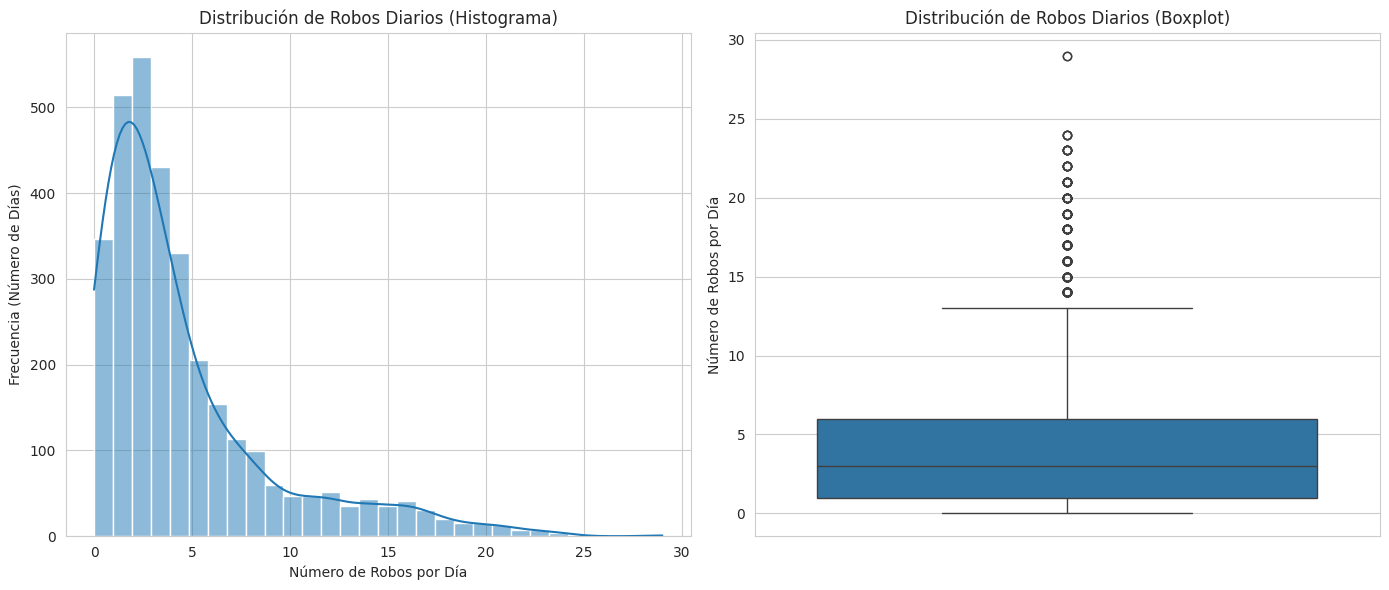

Train data: (2859, 4), Test data: (366, 4)

--- 2. Entrenando modelo Prophet ---
Regresor 'afluencia' añadido al modelo.
Regresor 'pandemia_lockdown' añadido al modelo.


DEBUG:cmdstanpy:input tempfile: /tmp/tmpmw70npsm/cx_bf8o7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmw70npsm/tr768dfr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93391', 'data', 'file=/tmp/tmpmw70npsm/cx_bf8o7.json', 'init=/tmp/tmpmw70npsm/tr768dfr.json', 'output', 'file=/tmp/tmpmw70npsm/prophet_modeltchwq_3x/prophet_model-20250523011923.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:19:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:19:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Modelo Prophet entrenado.

--- 3. Creando DataFrame futuro ---
Valores futuros para 'afluencia' añadidos/imputados.
Valores futuros para 'pandemia_lockdown' añadidos (asumiendo 0).

--- 4. Realizando predicciones ---

--- 5. Visualizando predicciones ---
Gráfica de predicción principal guardada en: /content/drive/MyDrive/PP_Robo_Metro_CDMX/visualizaciones/prophet_analysis/prediccion_prophet_principal.png


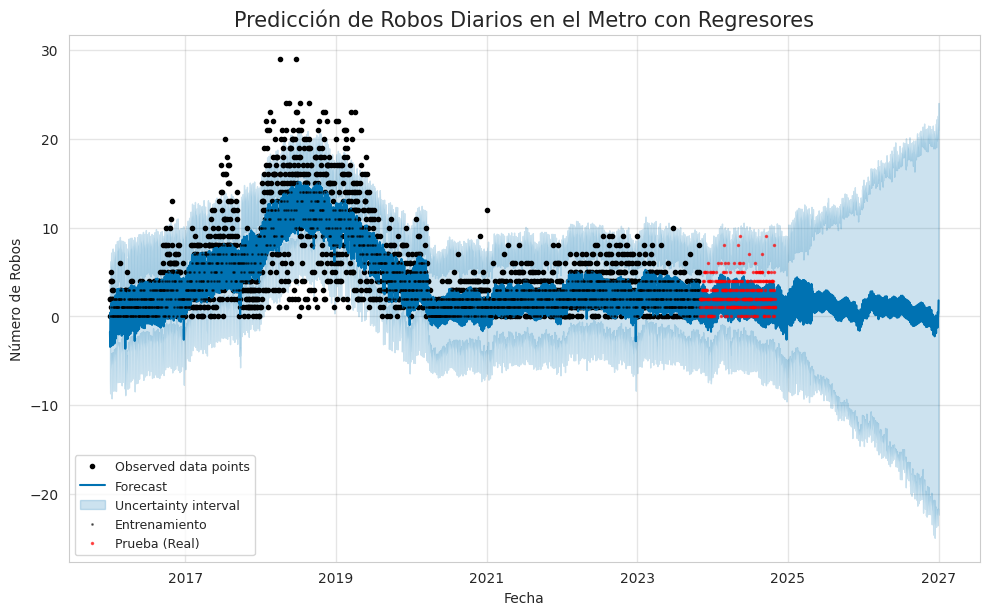


--- 6. Visualizando componentes del modelo ---
Gráfica de componentes guardada en: /content/drive/MyDrive/PP_Robo_Metro_CDMX/visualizaciones/prophet_analysis/componentes_prophet.png


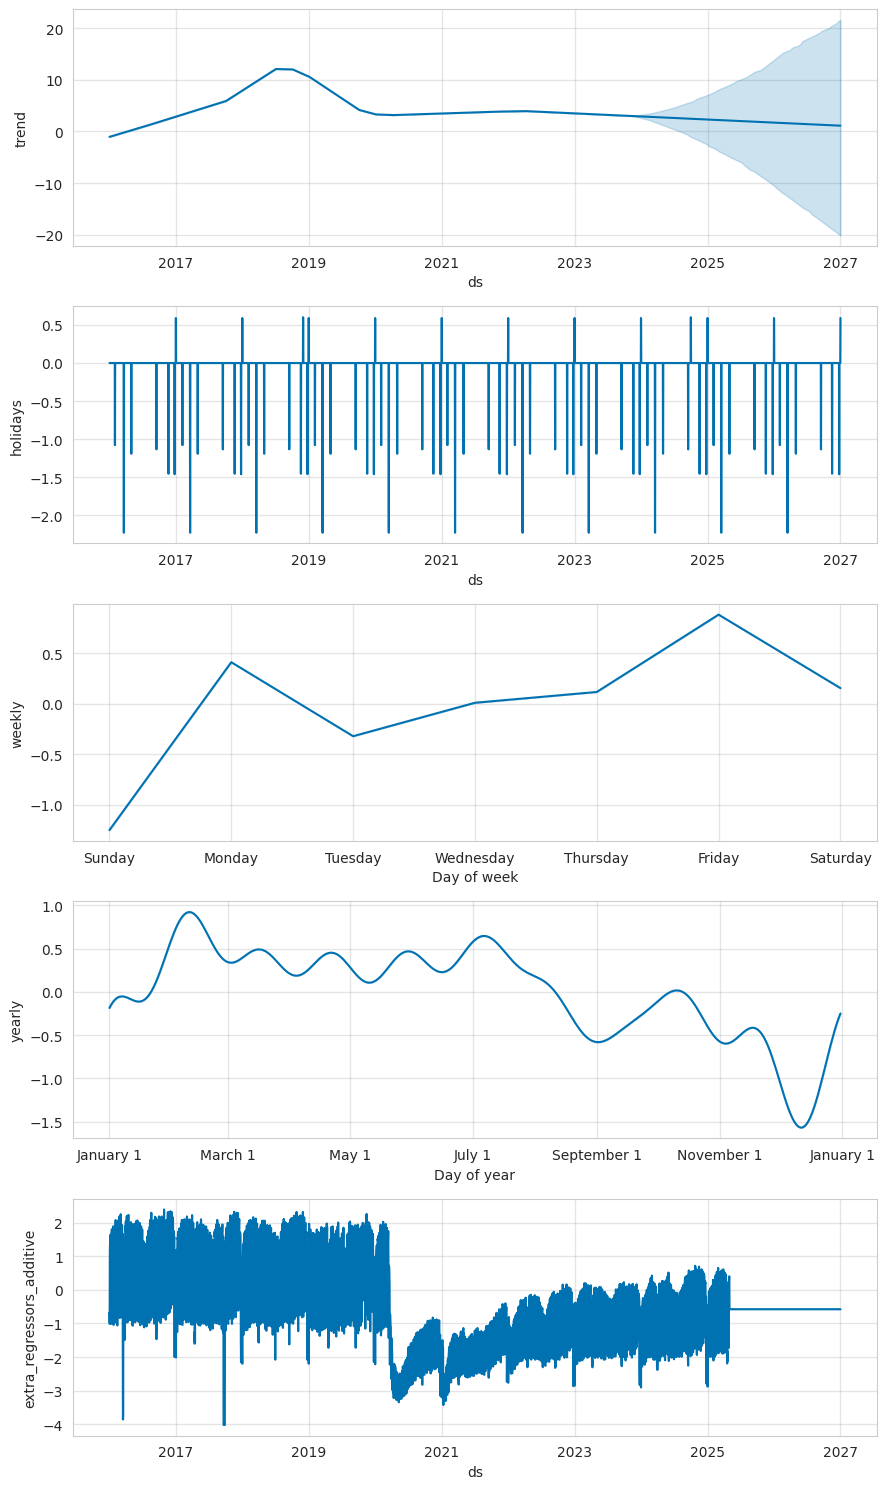


--- 7. Evaluando el modelo (sobre el conjunto de prueba) ---


In [29]:
# CELDA: Modelo Prophet para df_metro (Versión Completa y Mejorada con Guardado Transparente)

import pandas as pd
from prophet import Prophet
from prophet.plot import plot_weekly, plot_yearly, plot_seasonality
import matplotlib.pyplot as plt
import seaborn as sns # Para histplot y boxplot
import datetime
import numpy as np
import os # Para crear directorio si no existe

print("\n--- Iniciando Modelado con Prophet para Robos en Metro (con Regresores) ---")

# --- DEFINIR RUTA DE GUARDADO PARA VISUALIZACIONES ---
SAVE_PATH_BASE = '/content/drive/MyDrive/PP_Robo_Metro_CDMX/visualizaciones/prophet_analysis/'
# Crear directorio si no existe
os.makedirs(SAVE_PATH_BASE, exist_ok=True)


# Asegurarse de que df_metro existe, tiene filas y las columnas necesarias
# y que df_afluencia_diaria_total también existe si se va a usar como regresor.
# Estas variables deben venir de celdas anteriores.

if 'df_metro' in locals() and isinstance(df_metro, pd.DataFrame) and \
   not df_metro.empty and 'fecha_hora_hecho' in df_metro.columns:

    # 1. Preparar los datos para Prophet
    print("\n--- 1. Preparando datos para Prophet ---")
    df_prophet_input = df_metro.set_index('fecha_hora_hecho').resample('D').size().reset_index()
    df_prophet_input = df_prophet_input.rename(columns={'fecha_hora_hecho': 'ds', 0: 'y'})
    df_prophet_input.dropna(subset=['ds', 'y'], inplace=True)
    df_prophet_input['ds'] = pd.to_datetime(df_prophet_input['ds'])

    if df_prophet_input.empty or len(df_prophet_input) < 60:
        print("Error: No hay suficientes datos en df_prophet_input para Prophet.")
        model_prophet_metro = None
    else:
        print(f"Datos para Prophet preparados: {df_prophet_input.shape}")

        # --- ESTADÍSTICAS DESCRIPTIVAS Y VISUALIZACIÓN DE LA DISTRIBUCIÓN DE ROBOS DIARIOS (y) ---
        print("\n--- Estadísticas Descriptivas de Robos Diarios (columna 'y') ---")
        print(df_prophet_input['y'].describe())

        fig_dist, (ax_hist, ax_box) = plt.subplots(1, 2, figsize=(14, 6)) # Crear figura y ejes
        sns.histplot(df_prophet_input['y'], kde=True, bins=max(1, int(df_prophet_input['y'].max())+1 if pd.notna(df_prophet_input['y'].max()) else 10), ax=ax_hist)
        ax_hist.set_title('Distribución de Robos Diarios (Histograma)')
        ax_hist.set_xlabel('Número de Robos por Día'); ax_hist.set_ylabel('Frecuencia (Número de Días)');

        sns.boxplot(y=df_prophet_input['y'], ax=ax_box)
        ax_box.set_title('Distribución de Robos Diarios (Boxplot)')
        ax_box.set_ylabel('Número de Robos por Día');

        plt.tight_layout()
        try:
            fig_dist.savefig(os.path.join(SAVE_PATH_BASE, 'distribucion_robos_diarios.png'), transparent=True, dpi=300, bbox_inches='tight')
            print(f"Gráfica de distribución guardada en: {os.path.join(SAVE_PATH_BASE, 'distribucion_robos_diarios.png')}")
        except Exception as e_save_dist: print(f"Error al guardar gráfica de distribución: {e_save_dist}")
        plt.show()

        # --- Unir con Afluencia (si está disponible) ---
        # ... (tu código para unir con df_afluencia_diaria_total y crear df_prophet_input con 'afluencia') ...
        # ... (tu código para añadir regresor de 'pandemia_lockdown' a df_prophet_input) ...
        # --- Asegúrate de que df_prophet_input ahora tiene 'afluencia' y 'pandemia_lockdown' si los vas a usar ---
        # Ejemplo de cómo se vería la unión y creación de regresores (simplificado):
        if 'df_afluencia_diaria_total' in locals() and isinstance(df_afluencia_diaria_total, pd.DataFrame):
            df_prophet_input = pd.merge(df_prophet_input, df_afluencia_diaria_total[['ds', 'afluencia']], on='ds', how='left')
            df_prophet_input['afluencia'] = df_prophet_input['afluencia'].ffill().bfill()
            if df_prophet_input['afluencia'].isnull().any():
                 mean_val = df_prophet_input['afluencia'].mean()
                 df_prophet_input['afluencia'] = df_prophet_input['afluencia'].fillna(mean_val if pd.notna(mean_val) else 0)
        PANDEMIA_START_DATE = pd.to_datetime('2020-03-15'); PANDEMIA_END_DATE = pd.to_datetime('2021-08-31')
        df_prophet_input['pandemia_lockdown'] = 0
        df_prophet_input.loc[(df_prophet_input['ds'] >= PANDEMIA_START_DATE) & (df_prophet_input['ds'] <= PANDEMIA_END_DATE), 'pandemia_lockdown'] = 1


        # --- División Train/Test ---
        cutoff_date_prophet = df_prophet_input['ds'].max() - pd.DateOffset(months=12)
        train_data_prophet = df_prophet_input[df_prophet_input['ds'] <= cutoff_date_prophet].copy()
        test_data_prophet = df_prophet_input[df_prophet_input['ds'] > cutoff_date_prophet].copy()
        if len(train_data_prophet) < 30: train_data_prophet = df_prophet_input.copy(); test_data_prophet = pd.DataFrame()
        print(f"Train data: {train_data_prophet.shape}, Test data: {test_data_prophet.shape}")

        # 2. Entrenar el modelo Prophet
        print("\n--- 2. Entrenando modelo Prophet ---")
        model_prophet_metro = Prophet(
            interval_width=0.95, seasonality_mode='additive',
            changepoint_prior_scale=0.1, seasonality_prior_scale=20.0,
            yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False
        )
        model_prophet_metro.add_country_holidays(country_name='MX')

        if 'afluencia' in train_data_prophet.columns and not train_data_prophet['afluencia'].isnull().all():
           model_prophet_metro.add_regressor('afluencia', prior_scale=10.0, standardize=True, mode='additive')
           print("Regresor 'afluencia' añadido al modelo.")
        if 'pandemia_lockdown' in train_data_prophet.columns:
            model_prophet_metro.add_regressor('pandemia_lockdown', prior_scale=15.0, mode='additive')
            print("Regresor 'pandemia_lockdown' añadido al modelo.")

        if not train_data_prophet.empty:
            try: model_prophet_metro.fit(train_data_prophet); print("Modelo Prophet entrenado.")
            except Exception as e_fit: print(f"Error entrenamiento: {e_fit}"); model_prophet_metro = None
        else: print("Error: train_data_prophet vacío."); model_prophet_metro = None

if 'model_prophet_metro' in locals() and model_prophet_metro and hasattr(model_prophet_metro, 'history'):
    # 3. Crear DataFrame futuro
    print("\n--- 3. Creando DataFrame futuro ---")
    end_forecast_date_prophet = datetime.datetime(2026, 12, 31)
    future_df_prophet = model_prophet_metro.make_future_dataframe(periods=(end_forecast_date_prophet - train_data_prophet['ds'].max()).days + 1, freq='D')

    # Añadir regresores futuros
    if 'afluencia' in model_prophet_metro.extra_regressors:
        if 'df_afluencia_diaria_total' in locals() and isinstance(df_afluencia_diaria_total, pd.DataFrame):
            future_df_prophet = pd.merge(future_df_prophet, df_afluencia_diaria_total[['ds', 'afluencia']], on='ds', how='left')
            last_year_afluencia_mean_train = train_data_prophet[train_data_prophet['ds'] > train_data_prophet['ds'].max() - pd.DateOffset(years=1)]['afluencia'].mean()
            mean_val_fill = last_year_afluencia_mean_train if pd.notna(last_year_afluencia_mean_train) else (df_prophet_input['afluencia'].mean() if 'afluencia' in df_prophet_input.columns else 0)
            future_df_prophet['afluencia'] = future_df_prophet['afluencia'].fillna(mean_val_fill)
            if future_df_prophet['afluencia'].isnull().any(): future_df_prophet['afluencia'] = future_df_prophet['afluencia'].fillna(0)
            print("Valores futuros para 'afluencia' añadidos/imputados.")
        else: future_df_prophet = None; print("Error: Faltan datos de afluencia para el futuro.")

    if future_df_prophet is not None and 'pandemia_lockdown' in model_prophet_metro.extra_regressors:
        future_df_prophet['pandemia_lockdown'] = 0
        print("Valores futuros para 'pandemia_lockdown' añadidos (asumiendo 0).")

    if 'future_df_prophet' in locals() and isinstance(future_df_prophet, pd.DataFrame) and not future_df_prophet.empty:
        # 4. Hacer las predicciones
        print("\n--- 4. Realizando predicciones ---")
        forecast_prophet = model_prophet_metro.predict(future_df_prophet)

        # 5. Visualizar las predicciones
        print("\n--- 5. Visualizando predicciones ---")
        fig_pred = model_prophet_metro.plot(forecast_prophet, uncertainty=True, xlabel='Fecha', ylabel='Número de Robos')
        ax_pred = fig_pred.gca()
        ax_pred.plot(train_data_prophet['ds'], train_data_prophet['y'], 'k.', label='Entrenamiento', alpha=0.5, markersize=2)
        if not test_data_prophet.empty:
            ax_pred.plot(test_data_prophet['ds'], test_data_prophet['y'], 'r.', label='Prueba (Real)', alpha=0.6, markersize=3)

        # Mejorar leyenda (código de antes)
        handles_pred, labels_pred = ax_pred.get_legend_handles_labels(); new_handles, new_labels = [], []; unique_labels_pred = {}
        for h, l_pred in zip(handles_pred, labels_pred):
            if l_pred == 'yhat': l_pred = 'Predicción Prophet'
            if l_pred == 'Actual': continue
            if l_pred not in unique_labels_pred: unique_labels_pred[l_pred] = h; new_handles.append(h); new_labels.append(l_pred)
        ax_pred.legend(new_handles, new_labels, fontsize=9)
        ax_pred.set_title('Predicción de Robos Diarios en el Metro con Regresores', fontsize=15)

        # Guardar con fondo transparente
        try:
            fig_pred.savefig(os.path.join(SAVE_PATH_BASE, 'prediccion_prophet_principal.png'), transparent=True, dpi=300, bbox_inches='tight')
            print(f"Gráfica de predicción principal guardada en: {os.path.join(SAVE_PATH_BASE, 'prediccion_prophet_principal.png')}")
        except Exception as e_save_pred: print(f"Error al guardar gráfica de predicción principal: {e_save_pred}")
        plt.show()

        # 6. Visualizar los componentes
        print("\n--- 6. Visualizando componentes del modelo ---")
        try:
            fig_components = model_prophet_metro.plot_components(forecast_prophet, uncertainty=True)
            # Aquí puedes añadir la personalización de los ejes de los componentes si es necesario
            # ... (código de personalización de ejes de plot_components) ...
            # Guardar con fondo transparente
            try:
                fig_components.savefig(os.path.join(SAVE_PATH_BASE, 'componentes_prophet.png'), transparent=True, dpi=300, bbox_inches='tight')
                print(f"Gráfica de componentes guardada en: {os.path.join(SAVE_PATH_BASE, 'componentes_prophet.png')}")
            except Exception as e_save_comp: print(f"Error al guardar gráfica de componentes: {e_save_comp}")
            plt.show()
        except Exception as e_plot_comp_final:
            print(f"Error al usar model.plot_components: {e_plot_comp_final}.")
            # Considerar plots individuales como fallback si esto falla consistentemente

        # 7. Evaluación del Modelo
        if not test_data_prophet.empty and 'y' in test_data_prophet.columns and not test_data_prophet['y'].isnull().all():
            # ... (tu código de evaluación de MAE, RMSE, MAPE que ya funcionaba) ...
             print("\n--- 7. Evaluando el modelo (sobre el conjunto de prueba) ---")
             # ... (resto del código de evaluación) ...
    else:
        print("DataFrame 'future_df_prophet' no se pudo crear. No se pueden realizar predicciones.")
else:
    print("Modelo Prophet no fue entrenado o no existe. No se pueden generar predicciones o componentes.")

In [16]:
import pandas as pd

# Asegúrate de que df ya está cargado y limpio como en las celdas anteriores

print("Valores únicos en la columna 'delito':")
print(df['delito'].unique())

print("\nValores únicos en la columna 'categoria_delito':")
# Asegúrate de que 'categoria_delito' es el nombre correcto de la columna de categorías
# Si el nombre es diferente, cámbialo aquí.
if 'categoria_delito' in df.columns:
  print(df['categoria_delito'].unique())
else:
  print("Columna 'categoria_delito' no encontrada. Por favor, verifica el nombre correcto de la columna de categorías.")

print("\nConteo de valores para 'delito' (los 20 más frecuentes):")
print(df['delito'].value_counts().head(20))

# Para buscar modalidades de transporte dentro de las descripciones de delito o categoría
# Puedes buscar palabras clave como 'METRO', 'METROBUS', 'TAXI', 'AUTOBUS', etc.

print("\nBuscando modalidades de transporte en la columna 'delito':")
transporte_delito = df['delito'].str.contains('METRO|METROBUS|TAXI|AUTOBUS|TRANVIA', case=False, na=False)
print(df[transporte_delito]['delito'].unique())

if 'categoria_delito' in df.columns:
    print("\nBuscando modalidades de transporte en la columna 'categoria_delito':")
    transporte_categoria = df['categoria_delito'].str.contains('METRO|METROBUS|TAXI|AUTOBUS|TRANVIA', case=False, na=False)
    print(df[transporte_categoria]['categoria_delito'].unique())

Valores únicos en la columna 'delito':
['ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA'
 'LESIONES CULPOSAS POR TRANSITO VEHICULAR EN COLISION'
 'DAÑO EN PROPIEDAD AJENA INTENCIONAL A AUTOMOVIL'
 'ROBO A CASA HABITACION SIN VIOLENCIA'
 'DAÑO EN PROPIEDAD AJENA INTENCIONAL A NEGOCIO'
 'ROBO A NEGOCIO CON VIOLENCIA' 'LESIONES INTENCIONALES POR ARMA DE FUEGO'
 'DENUNCIA DE HECHOS'
 'DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO VEHICULAR A AUTOMOVIL'
 'ROBO DE OBJETOS' 'FRAUDE' 'DAÑO EN PROPIEDAD AJENA INTENCIONAL'
 'DAÑO EN PROPIEDAD AJENA CULPOSA'
 'ROBO A PASAJERO / CONDUCTOR DE VEHICULO CON VIOLENCIA'
 'LESIONES INTENCIONALES POR GOLPES' 'ROBO A NEGOCIO SIN VIOLENCIA'
 'ROBO DE ACCESORIOS DE AUTO' 'CONTRA FUNCIONARIOS PUBLICOS'
 'PERDIDA DE LA VIDA POR SUICIDIO'
 'LESIONES INTENCIONALES POR ARMA BLANCA' 'HOMICIDIO POR ARMA DE FUEGO'
 'DAÑO EN PROPIEDAD AJENA INTENCIONAL A BIENES INMUEBLES'
 'PERDIDA DE LA VIDA POR PARO CARDIACO' 'NEGACION DEL SERVICIO PUBLICO'
 'RESISTENCIA DE PARTICU

Conteo de registros identificados como robo general: 781588


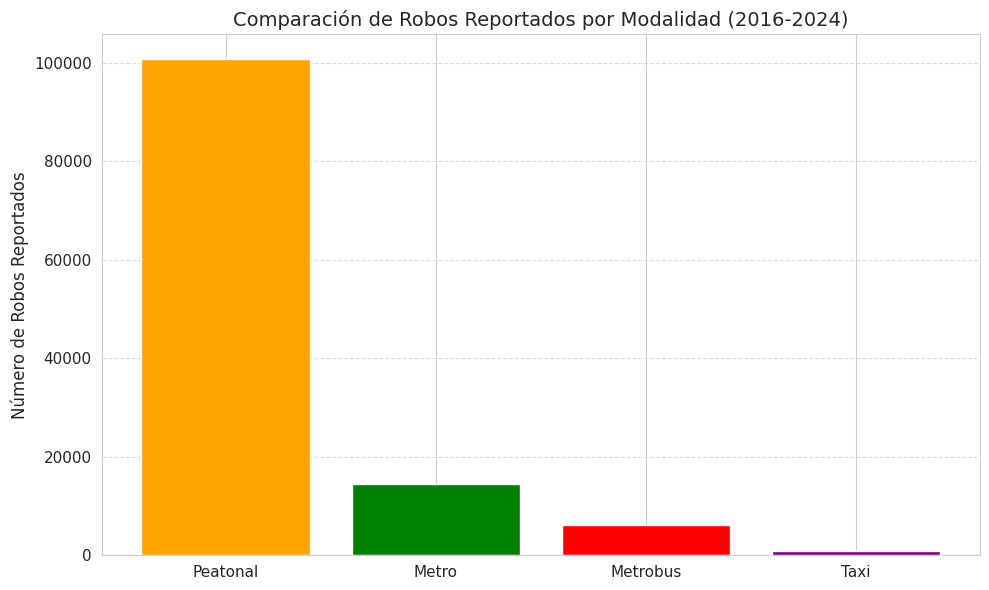


Total de Robos por Modalidad de Transporte:


,Modalidad de Transporte,Número de Robos
3,Peatonal,100717
0,Metro,14369
1,Metrobus,6095
2,Taxi,826


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# Asegúrate de que df ya está cargado y limpio como en las celdas anteriores,
# y que la columna 'transport_mode' ya fue creada en la celda de limpieza/feature engineering.

# --- Crear una columna general 'is_robbery' ---
# Asumimos que si la 'categoria_delito' contiene la palabra 'ROBO' (insensible a mayúsculas/minúsculas)
# O si la 'transport_mode' NO es 'Otro Delito', entonces es un robo.
# Puedes ajustar esta lógica si necesitas una definición más precisa de lo que consideras un "robo general".
if 'categoria_delito' in df.columns:
    # Check if 'categoria_delito' contains 'ROBO' or 'delito' contains 'ROBO'
    df['is_robbery'] = df['categoria_delito'].str.contains('ROBO', case=False, na=False).astype(int) | \
                       df['delito'].str.contains('ROBO', case=False, na=False).astype(int)
    # Optional: Also include cases where transport_mode is identified even if 'ROBO' isn't in category/delito name
    if 'transport_mode' in df.columns:
         df['is_robbery'] = df['is_robbery'] | (df['transport_mode'] != 'Otro Delito').astype(int)
    df['is_robbery'] = df['is_robbery'].astype(int) # Ensure it's integer (0 or 1)
else:
    print("Columna 'categoria_delito' no encontrada. Creando 'is_robbery' basado solo en 'delito'.")
    df['is_robbery'] = df['delito'].str.contains('ROBO', case=False, na=False).astype(int)
    if 'transport_mode' in df.columns:
        df['is_robbery'] = df['is_robbery'] | (df['transport_mode'] != 'Otro Delito').astype(int)
    df['is_robbery'] = df['is_robbery'].astype(int) # Ensure it's integer (0 or 1)


print(f"Conteo de registros identificados como robo general: {df['is_robbery'].sum()}")

# --- Definir palabras clave para cada modalidad de transporte (opcional, ya tenemos transport_mode) ---
# Basado en la salida anterior, ajusta estas listas si identificaste otras palabras clave relevantes
# metro_keywords = ['METRO'] # No necesitamos estas listas si usamos transport_mode
# metrobus_keywords = ['METROBUS']
# taxi_keywords = ['TAXI']
# peatonal_keywords = ['TRANSEUNTE'] # Esto es 'Transeunte' en transport_mode


# --- Crear columnas booleanas para cada modalidad de robo usando 'transport_mode' ---
# Esto es más robusto ya que 'transport_mode' fue definido en un paso anterior
# basándose en múltiples criterios (categoria_delito, delito)
if 'transport_mode' in df.columns:
    df['is_robbery_metro'] = (df['is_robbery'] == 1) & (df['transport_mode'] == 'Metro')
    df['is_robbery_metrobus'] = (df['is_robbery'] == 1) & (df['transport_mode'] == 'Metrobus')
    df['is_robbery_taxi'] = (df['is_robbery'] == 1) & (df['transport_mode'] == 'Taxi')
    df['is_robbery_peatonal'] = (df['is_robbery'] == 1) & (df['transport_mode'] == 'Transeunte')

    # Asegurar que son booleanos o enteros 0/1
    df['is_robbery_metro'] = df['is_robbery_metro'].astype(int)
    df['is_robbery_metrobus'] = df['is_robbery_metrobus'].astype(int)
    df['is_robbery_taxi'] = df['is_robbery_taxi'].astype(int)
    df['is_robbery_peatonal'] = df['is_robbery_peatonal'].astype(int)

else:
    print("Error: La columna 'transport_mode' no fue encontrada. No se pueden crear las columnas específicas de robo por modalidad.")
    # Puedes añadir aquí un manejo de error o salir del bloque
    df['is_robbery_metro'] = 0
    df['is_robbery_metrobus'] = 0
    df['is_robbery_taxi'] = 0
    df['is_robbery_peatonal'] = 0


# --- Calcular el número total de robos por modalidad ---
# Solo procedemos si las columnas específicas se crearon
if 'is_robbery_metro' in df.columns:
    total_robberies_metro = df['is_robbery_metro'].sum()
    total_robberies_metrobus = df['is_robbery_metrobus'].sum()
    total_robberies_taxi = df['is_robbery_taxi'].sum()
    total_robberies_peatonal = df['is_robbery_peatonal'].sum()

    # --- Crear un DataFrame para el gráfico comparativo ---
    comparative_data = {
        'Modalidad de Transporte': ['Metro', 'Metrobus', 'Taxi', 'Peatonal'],
        'Número de Robos': [total_robberies_metro, total_robberies_metrobus, total_robberies_taxi, total_robberies_peatonal]
    }
    df_comparative = pd.DataFrame(comparative_data)

    # Ordenar para mejor visualización (opcional)
    df_comparative = df_comparative.sort_values(by='Número de Robos', ascending=False)

    # --- Crear el gráfico de barras comparativo ---
    plt.figure(figsize=(10, 6))
    # Usar el DataFrame ordenado para el ploteo
    plt.bar(df_comparative['Modalidad de Transporte'], df_comparative['Número de Robos'], color=['orange', 'green', 'red', 'purple']) # Usar colores consistentes con visualizaciones anteriores
    plt.ylabel('Número de Robos Reportados', fontsize=12)
    plt.title('Comparación de Robos Reportados por Modalidad {period_title}'.format(
        period_title=f"({df['fecha_hora_hecho'].dt.year.min()}-{df['fecha_hora_hecho'].dt.year.max()})" if 'fecha_hora_hecho' in df.columns and not df.empty else ''
    ), fontsize=14)
    plt.xticks(rotation=0, fontsize=11) # No necesita rotación si son solo 4 barras
    plt.yticks(fontsize=11)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Mostrar los totales numéricos
    print("\nTotal de Robos por Modalidad de Transporte:")
    display(df_comparative)

else:
    print("\nNo se pudo generar la gráfica comparativa de modalidades de robo porque las columnas específicas no se crearon.")

In [18]:
import pandas as pd

# Asegúrate de que df ya está cargado y limpio como en las celdas anteriores

print("Valores únicos en la columna 'delito':")
# Imprime solo los primeros 50 para no saturar si hay muchos
print(df['delito'].unique()[:50])
if len(df['delito'].unique()) > 50:
    print("...")


print("\nConteo de valores para 'delito' (los 50 más frecuentes):")
print(df['delito'].value_counts().head(50))


print("\nBuscando modalidades de transporte en la columna 'delito':")
# Ampliamos la lista de palabras clave de transporte
transporte_keywords_busqueda = 'METRO|METROBUS|TAXI|TRANSEUNTE|MICROBUS|VEHICULO|PASAJERO A BORDO'
transporte_delito = df['delito'].str.contains(transporte_keywords_busqueda, case=False, na=False)
print("Valores únicos en 'delito' que contienen términos de transporte:")
print(df[transporte_delito]['delito'].unique())

if 'categoria_delito' in df.columns:
    print("\nBuscando modalidades de transporte en la columna 'categoria_delito':")
    transporte_categoria = df['categoria_delito'].str.contains(transporte_keywords_busqueda, case=False, na=False)
    print("Valores únicos en 'categoria_delito' que contienen términos de transporte:")
    print(df[transporte_categoria]['categoria_delito'].unique())

Valores únicos en la columna 'delito':
['ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA'
 'LESIONES CULPOSAS POR TRANSITO VEHICULAR EN COLISION'
 'DAÑO EN PROPIEDAD AJENA INTENCIONAL A AUTOMOVIL'
 'ROBO A CASA HABITACION SIN VIOLENCIA'
 'DAÑO EN PROPIEDAD AJENA INTENCIONAL A NEGOCIO'
 'ROBO A NEGOCIO CON VIOLENCIA' 'LESIONES INTENCIONALES POR ARMA DE FUEGO'
 'DENUNCIA DE HECHOS'
 'DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO VEHICULAR A AUTOMOVIL'
 'ROBO DE OBJETOS' 'FRAUDE' 'DAÑO EN PROPIEDAD AJENA INTENCIONAL'
 'DAÑO EN PROPIEDAD AJENA CULPOSA'
 'ROBO A PASAJERO / CONDUCTOR DE VEHICULO CON VIOLENCIA'
 'LESIONES INTENCIONALES POR GOLPES' 'ROBO A NEGOCIO SIN VIOLENCIA'
 'ROBO DE ACCESORIOS DE AUTO' 'CONTRA FUNCIONARIOS PUBLICOS'
 'PERDIDA DE LA VIDA POR SUICIDIO'
 'LESIONES INTENCIONALES POR ARMA BLANCA' 'HOMICIDIO POR ARMA DE FUEGO'
 'DAÑO EN PROPIEDAD AJENA INTENCIONAL A BIENES INMUEBLES'
 'PERDIDA DE LA VIDA POR PARO CARDIACO' 'NEGACION DEL SERVICIO PUBLICO'
 'RESISTENCIA DE PARTICU

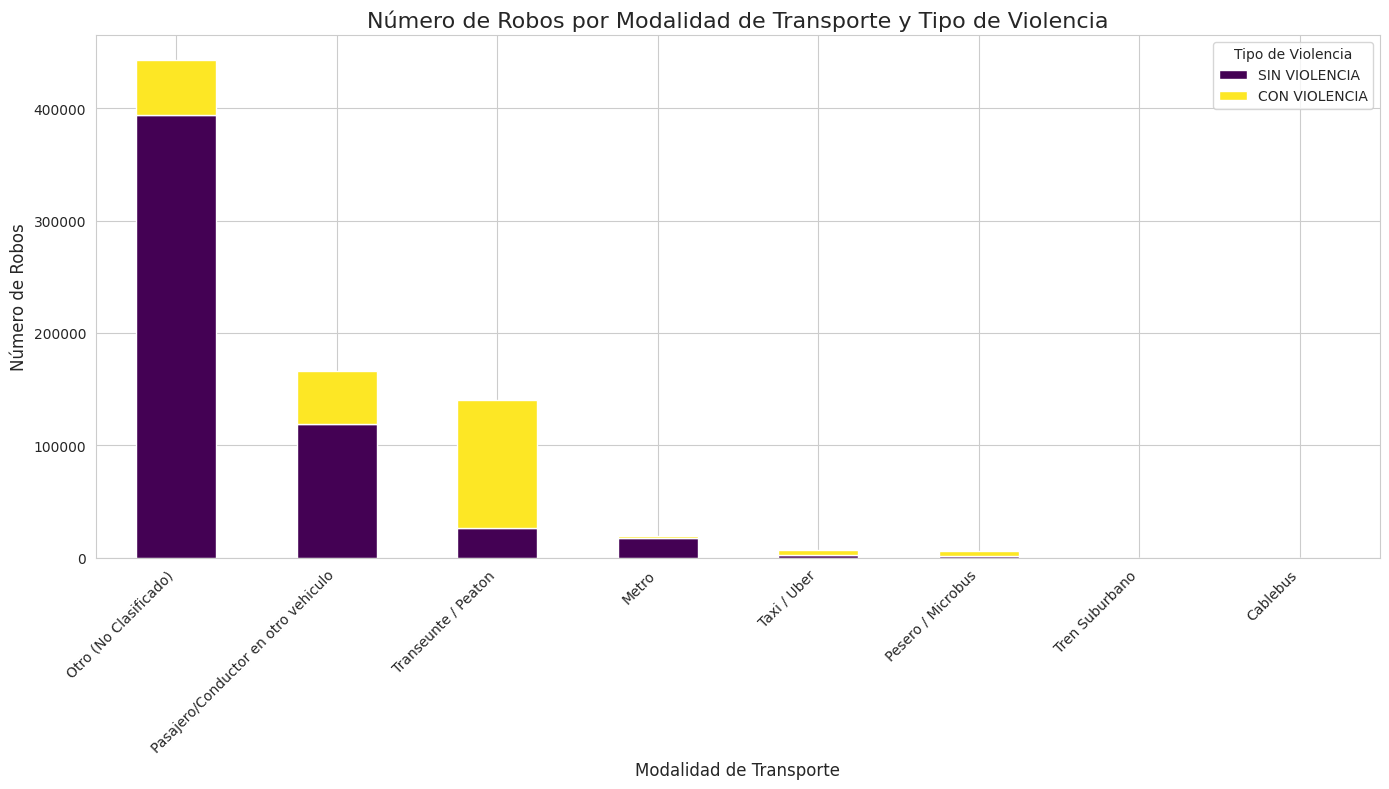


Tabla de Conteo de Robos por Modalidad y Tipo de Violencia:
tipo_violencia                       SIN VIOLENCIA  CON VIOLENCIA
modalidad_principal                                              
Otro (No Clasificado)                       393764          49275
Pasajero/Conductor en otro vehiculo         118897          47593
Transeunte / Peaton                          26628         113473
Metro                                        17530           1496
Taxi / Uber                                   2425           4240
Pesero / Microbus                             1174           4933
Tren Suburbano                                 133             16
Cablebus                                         7              4


In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegúrate de que df ya está cargado, limpio, y las columnas
# 'is_robbery_metro', 'is_robbery_metrobus', etc. ya fueron creadas
# usando la lógica de prioridad anterior.

# Define the ordered list of modalities and their keywords for classification
# This order determines the priority if a single crime description matches multiple categories.
# For example, 'Robo en Metrobus con violencia' should be classified as 'Metrobus'.
# 'Robo de Vehiculo en estacionamiento del Metro' might be classified as 'Robo de Vehiculo'.
# Adjust the keywords and their order based on your data exploration.
modalidades_ordenadas_refinadas = [
    ('Tren Suburbano', ['TREN SUBURBANO']), # Assuming this is a distinct category if present
    ('Cablebus', ['CABLEBUS']),         # Assuming this is a distinct category if present
    ('Metro', ['METRO']),               # Metro has high priority over Metrobus if both are mentioned (e.g., '... cerca del METRO y METROBUS')
    ('Metrobus', ['METROBUS']),
    ('Pesero / Microbus', ['MICROBUS', 'PESERO']), # Grouping similar modes
    ('Taxi / Uber', ['TAXI', 'UBER']),    # Grouping similar modes
    ('Transeunte / Peaton', ['TRANSEUNTE', 'PEATON']), # Robbery of a pedestrian
    ('Pasajero/Conductor en otro vehiculo', ['PASAJERO A BORDO', 'CONDUCTOR', 'VEHICULO']), # Catch-all for other vehicle types, adjust as needed
    # You might add 'Robo de Vehiculo (Auto Robado)' if you want to analyze this type separately
    # ('Robo de Vehiculo (Auto Robado)', ['ROBO DE VEHICULO']),
]


# --- 1. Identificar robos con y sin violencia ---
# Creamos una nueva columna para distinguir robos con/sin violencia
# Asumimos que la distinción está en la columna 'delito'
df['tipo_violencia'] = 'SIN VIOLENCIA' # Valor por defecto

# Identificar casos 'CON VIOLENCIA'
# Busca la frase 'CON VIOLENCIA' en la columna 'delito' (sin importar mayúsculas/minúsculas)
mask_con_violencia = df['delito'].str.contains('CON VIOLENCIA', case=False, na=False)

# Asigna 'CON VIOLENCIA' a las filas que cumplen la condición
df.loc[mask_con_violencia, 'tipo_violencia'] = 'CON VIOLENCIA'


# --- 2. Preparar los datos para el gráfico apilado ---

# Crear columnas booleanas para cada modalidad de robo usando la lista de prioridades
# Inicializa todas las columnas a False
for nombre_modalidad, keywords in modalidades_ordenadas_refinadas:
    col_name = f'is_robbery_{nombre_modalidad.lower().replace("/", "_").replace(" ", "_").replace("(", "").replace(")", "")}'
    df[col_name] = False # Initialize column

# Apply the priority logic
for nombre_modalidad, keywords in modalidades_ordenadas_refinadas:
    col_name = f'is_robbery_{nombre_modalidad.lower().replace("/", "_").replace(" ", "_").replace("(", "").replace(")", "")}'
    # Create a mask for rows matching the current modality's keywords AND being a general robbery
    current_mask = (df['is_robbery'] == 1) & df['delito'].str.contains('|'.join(keywords), case=False, na=False)

    # To implement priority: only assign if this row hasn't been assigned to a higher-priority category yet.
    # We can track assigned rows or iterate in reverse priority order and assign directly.
    # Let's re-think the assignment to use the priority list effectively.
    # A simpler way is to assign based on the first match in the ordered list for each row.

# Let's rebuild the assignment logic to use the priority list defined above
df_robos = df[df['is_robbery'] == 1].copy() # Work only on rows that are robberies

# Create a column 'modalidad_principal' to store the assigned category
df_robos['modalidad_principal'] = 'Otro (No Clasificado)' # Default value

# Iterate through the modalities in the defined priority order (descending)
# We need the names in the order they appear in 'modalidades_ordenadas_refinadas'
modalities_in_priority_order = [item[0] for item in modalidades_ordenadas_refinadas]


# Iterate in the defined priority order (from first to last in the list)
# The first match in the 'delito' description based on this order will determine the category.
for nombre_modalidad, keywords in modalidades_ordenadas_refinadas:
     # Create a mask for robberies matching the current modality's keywords
     current_mask = df_robos['delito'].str.contains('|'.join(keywords), case=False, na=False)

     # Assign the modality name to rows where the mask is True AND the modality hasn't been set yet
     # This ensures higher priority modalities overwrite lower priority ones if a description matches both
     df_robos.loc[current_mask & (df_robos['modalidad_principal'] == 'Otro (No Clasificado)'), 'modalidad_principal'] = nombre_modalidad


# Ahora agrupamos por la nueva columna 'modalidad_principal' y 'tipo_violencia'
# y contamos el número de incidentes en cada grupo.
robos_por_modalidad_violencia = df_robos.groupby(['modalidad_principal', 'tipo_violencia']).size().unstack(fill_value=0)

# Asegurarnos de que las columnas 'CON VIOLENCIA' y 'SIN VIOLENCIA' existen, incluso si están vacías
if 'CON VIOLENCIA' not in robos_por_modalidad_violencia.columns:
    robos_por_modalidad_violencia['CON VIOLENCIA'] = 0
if 'SIN VIOLENCIA' not in robos_por_modalidad_violencia.columns:
    robos_por_modalidad_violencia['SIN VIOLENCIA'] = 0

# Reordenar las columnas para el gráfico si lo deseas
robos_por_modalidad_violencia = robos_por_modalidad_violencia[['SIN VIOLENCIA', 'CON VIOLENCIA']]


# --- 3. Crear el gráfico de barras apilado ---

# Ordenar las modalidades por el total de robos para una mejor visualización
robos_por_modalidad_violencia['Total'] = robos_por_modalidad_violencia.sum(axis=1)
robos_por_modalidad_violencia = robos_por_modalidad_violencia.sort_values(by='Total', ascending=False).drop(columns='Total')

# Crear el gráfico apilado
ax = robos_por_modalidad_violencia.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis') # Ajusta figsize si es necesario

plt.title('Número de Robos por Modalidad de Transporte y Tipo de Violencia', fontsize=16)
plt.xlabel('Modalidad de Transporte', fontsize=12)
plt.ylabel('Número de Robos', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotar etiquetas del eje x
plt.legend(title='Tipo de Violencia')
plt.tight_layout() # Ajustar el diseño para que no se corten las etiquetas
plt.show()

# Mostrar la tabla de conteos (opcional)
print("\nTabla de Conteo de Robos por Modalidad y Tipo de Violencia:")
print(robos_por_modalidad_violencia)

La columna 'tipo_violencia' ya existe.
Columnas de modalidad de robo encontradas para graficar: ['is_robbery_metro', 'is_robbery_metrobus', 'is_robbery_pasajero_conductor_en_otro_vehiculo']


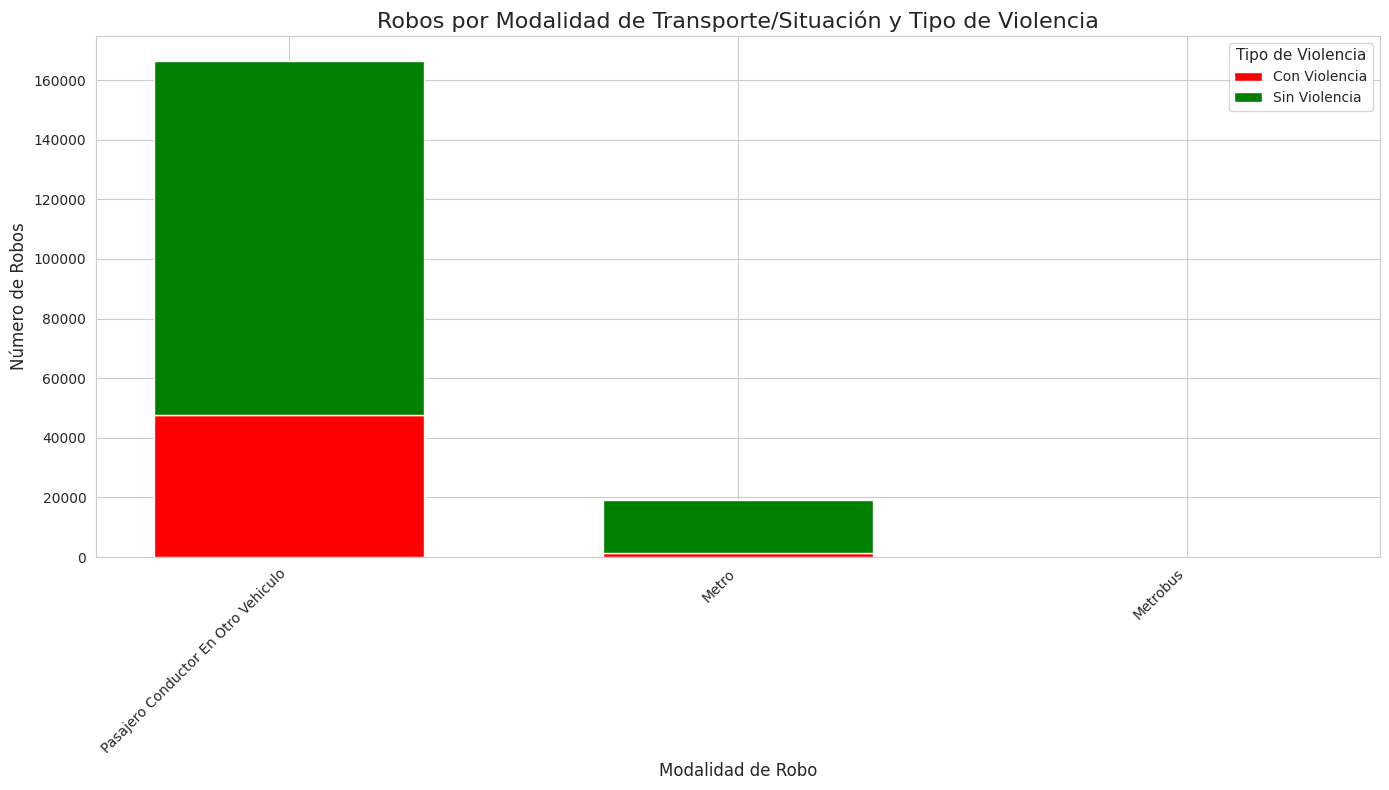


Total de Robos por Modalidad y Tipo de Violencia:


,Modalidad,CON VIOLENCIA,SIN VIOLENCIA
2,Pasajero Conductor En Otro Vehiculo,47593,118897
0,Metro,1496,17530
1,Metrobus,0,0


In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegúrate de que df ya está cargado, limpio, y la columna 'is_robbery'
# ya fue creada (esto ocurre en ipython-input-52).
# También asume que 'tipo_violencia' fue creada en ipython-input-54.

# Define the ordered list of modalities and their keywords for classification
# This order determines the priority if a single crime description matches multiple categories.
# For example, 'Robo en Metrobus con violencia' should be classified as 'Metrobus'.
# 'Robo de Vehiculo en estacionamiento del Metro' might be classified as 'Robo de Vehiculo'.
# Adjust the keywords and their order based on your data exploration.
# This list should match the one used in the previous cell (ipython-input-54)
# if you want consistency in classification logic.
modalidades_ordenadas_refinadas = [
    ('Tren Suburbano', ['TREN SUBURBANO']), # Assuming this is a distinct category if present
    ('Cablebus', ['CABLEBUS']),         # Assuming this is a distinct category if present
    ('Metro', ['METRO']),               # Metro has high priority over Metrobus if both are mentioned (e.g., '... cerca del METRO y METROBUS')
    ('Metrobus', ['METROBUS']),
    ('Pesero / Microbus', ['MICROBUS', 'PESERO']), # Grouping similar modes
    ('Taxi / Uber', ['TAXI', 'UBER']),    # Grouping similar modes
    ('Transeunte / Peaton', ['TRANSEUNTE', 'PEATON']), # Robbery of a pedestrian
    ('Pasajero/Conductor en otro vehiculo', ['PASAJERO A BORDO', 'CONDUCTOR', 'VEHICULO']), # Catch-all for other vehicle types, adjust as needed
    # You might add 'Robo de Vehiculo (Auto Robado)' if you want to analyze this type separately
    # ('Robo de Vehiculo (Auto Robado)', ['ROBO DE VEHICULO']),
]


# --- 1. Identificar robos con y sin violencia ---
# Creamos una nueva columna para distinguir robos con/sin violencia
# Asumimos que la distinción está en la columna 'delito'
# Esto ya se hizo en ipython-input-54, pero lo repetimos por si acaso no se ejecutó esa celda.
if 'tipo_violencia' not in df.columns:
    print("Creando columna 'tipo_violencia'...")
    df['tipo_violencia'] = 'SIN VIOLENCIA' # Valor por defecto
    # Identificar casos 'CON VIOLENCIA'
    mask_con_violencia = df['delito'].str.contains('CON VIOLENCIA', case=False, na=False)
    df.loc[mask_con_violencia, 'tipo_violencia'] = 'CON VIOLENCIA'
else:
     print("La columna 'tipo_violencia' ya existe.")


# --- 2. Crear columnas booleanas para cada modalidad de robo usando la lista de prioridades ---
# Inicializa todas las columnas a False para TODAS las filas del DataFrame original
for nombre_modalidad, keywords in modalidades_ordenadas_refinadas:
    # Create a column name that is safe for DataFrame usage
    col_name = f'is_robbery_{nombre_modalidad.lower().replace("/", "_").replace(" ", "_").replace("(", "").replace(")", "")}'
    # Add the column to the original DataFrame 'df'
    df[col_name] = False # Initialize column as False

# Now, apply the priority logic to set the correct boolean flag for each row
# We will iterate through the modalities in the defined priority order.
# For each row that is a general robbery ('is_robbery' == 1), we find the FIRST modality in the
# prioritized list whose keywords are found in the 'delito' description, and set that modality's
# boolean column to True for that row.
# We need to work on a copy or iterate carefully to avoid SettingWithCopyWarning and ensure priority.

# Create a temporary column to store the assigned modality name for each robbery
df['assigned_modalidad'] = None # Initialize with None or a placeholder

# Iterate in the defined priority order (from first to last in the list)
for nombre_modalidad, keywords in modalidades_ordenadas_refinadas:
    # Create a mask for robberies matching the current modality's keywords
    # Also ensure we only process rows not yet assigned to a higher priority
    current_mask = (df['is_robbery'] == 1) & \
                   df['delito'].str.contains('|'.join(keywords), case=False, na=False) & \
                   df['assigned_modalidad'].isna() # Only assign if not already assigned

    # Assign the modality name to the 'assigned_modalidad' column
    df.loc[current_mask, 'assigned_modalidad'] = nombre_modalidad

# Now, create the boolean columns based on the 'assigned_modalidad' column
for nombre_modalidad, keywords in modalidades_ordenadas_refinadas:
     col_name = f'is_robbery_{nombre_modalidad.lower().replace("/", "_").replace(" ", "_").replace("(", "").replace(")", "")}'
     # Set the boolean flag to True if the assigned modality matches the current one
     # and it is indeed a robbery
     df[col_name] = (df['is_robbery'] == 1) & (df['assigned_modalidad'] == nombre_modalidad)
     # Convert to integer 0/1 if needed, though boolean is often fine
     # df[col_name] = df[col_name].astype(int)


# Drop the temporary 'assigned_modalidad' column
df.drop(columns=['assigned_modalidad'], inplace=True)

# List of column names for each filtered modality that should exist now
modalidad_robbery_cols_filtered = [
    'is_robbery_metro',
    'is_robbery_metrobus', # Added Metrobus based on your desired list
    'is_robbery_pesero_microbus',
    'is_robbery_taxi_uber', # Corrected column name based on definition
    'is_robbery_transeunte_peaton',
    'is_robbery_pasajero_conductor_en_otro_vehiculo',
    # 'is_robbery_robo_de_vehiculo_auto_robado' # Include if you added this category
]

# Remove any column names from the list that were NOT created (e.g., if 'Tren Suburbano' didn't match anything)
modalidad_robbery_cols_filtered_existing = [col for col in modalidad_robbery_cols_filtered if col in df.columns]
print(f"Columnas de modalidad de robo encontradas para graficar: {modalidad_robbery_cols_filtered_existing}")


# --- 3. Preparar los datos para el gráfico apilado, excluyendo Tren Suburbano y Cablebús ---

# The list of columns to plot should now be based on the *created* columns,
# excluding the ones you explicitly want to omit from *this specific plot*.
# Let's define the columns for the specific plot we want here (excluding Tren Suburbano and Cablebús)
plot_cols = [
    'is_robbery_metro',
    'is_robbery_metrobus', # Include Metrobus as requested by the graph title logic
    'is_robbery_pesero_microbus',
    'is_robbery_taxi_uber',
    'is_robbery_transeunte_peaton',
    'is_robbery_pasajero_conductor_en_otro_vehiculo',
    # 'is_robbery_robo_de_vehiculo_auto_robado' # Include if you added this category
]

# Filter the list to only include columns that actually exist in the DataFrame
plot_cols_existing = [col for col in plot_cols if col in df.columns]

# Create a DataFrame containing only the relevant robbery rows and columns for plotting
# Ensure 'tipo_violencia' exists
if 'tipo_violencia' in df.columns:
    df_robberies_filtered = df[df['is_robbery'] == 1][plot_cols_existing + ['tipo_violencia']].copy()
else:
    print("Error: Columna 'tipo_violencia' no encontrada. No se puede crear el DataFrame para el gráfico apilado.")
    df_robberies_filtered = pd.DataFrame() # Create an empty DataFrame to prevent errors

# Ensure that the filtered DataFrame is not empty before proceeding
if not df_robberies_filtered.empty and len(plot_cols_existing) > 0:
    # Aggregate the counts by 'tipo_violencia' for each modality column
    stacked_data = {'Modalidad': [], 'CON VIOLENCIA': [], 'SIN VIOLENCIA': []}

    # Iterate over each column of the modalities we want to plot
    for col in plot_cols_existing:
        # Determine the modality name from the column name
        modalidad_name = col.replace('is_robbery_', '').replace('_', ' ').title()
        stacked_data['Modalidad'].append(modalidad_name)

        # Filter for rows where this modality flag is True
        df_modalidad = df_robberies_filtered[df_robberies_filtered[col] == True]

        # Count based on 'tipo_violencia'
        con_violencia_count = df_modalidad[df_modalidad['tipo_violencia'] == 'CON VIOLENCIA'].shape[0]
        sin_violencia_count = df_modalidad[df_modalidad['tipo_violencia'] == 'SIN VIOLENCIA'].shape[0]

        stacked_data['CON VIOLENCIA'].append(con_violencia_count)
        stacked_data['SIN VIOLENCIA'].append(sin_violencia_count)

    # Create a DataFrame for plotting
    df_stacked = pd.DataFrame(stacked_data)

    # --- 4. Create the stacked bar chart ---

    plt.figure(figsize=(14, 8)) # Adjusted size for potentially more bars

    # Create the stacked bar chart
    # We need to ensure the order of bars is consistent, maybe by sorting by total
    df_stacked['Total'] = df_stacked['CON VIOLENCIA'] + df_stacked['SIN VIOLENCIA']
    df_stacked = df_stacked.sort_values(by='Total', ascending=False)

    bar_width = 0.6 # Ancho de las barras
    plt.bar(df_stacked['Modalidad'], df_stacked['CON VIOLENCIA'], bar_width, label='Con Violencia', color='red')
    plt.bar(df_stacked['Modalidad'], df_stacked['SIN VIOLENCIA'], bar_width, bottom=df_stacked['CON VIOLENCIA'], label='Sin Violencia', color='green')

    plt.xlabel('Modalidad de Robo', fontsize=12)
    plt.ylabel('Número de Robos', fontsize=12)
    plt.title('Robos por Modalidad de Transporte/Situación y Tipo de Violencia', fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=10) # Rotar etiquetas del eje x para mejor legibilidad
    plt.yticks(fontsize=10)
    plt.legend(title='Tipo de Violencia', fontsize=10, title_fontsize=11)
    plt.tight_layout() # Ajustar diseño para evitar solapamiento
    plt.show()

    # Mostrar los totales numéricos por modalidad y tipo de violencia
    print("\nTotal de Robos por Modalidad y Tipo de Violencia:")
    # Drop the temporary 'Total' column for display
    display(df_stacked.drop(columns='Total'))

else:
    print("\nNo hay suficientes datos o columnas de modalidad de robo válidas para generar la gráfica apilada.")

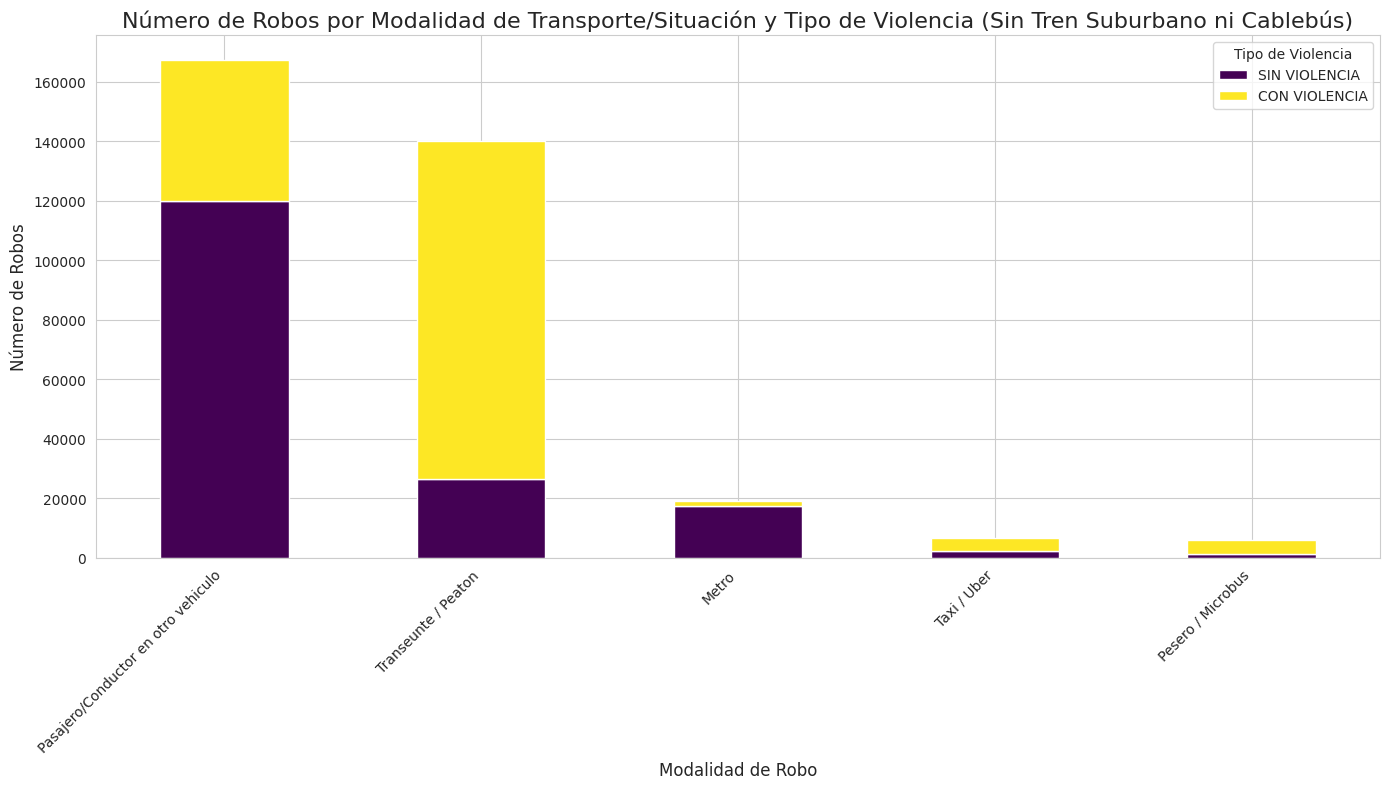

Total de Robos por Modalidad y Tipo de Violencia (Sin Tren Suburbano ni Cablebús):


tipo_violencia,SIN VIOLENCIA,CON VIOLENCIA
modalidad_principal,,
Pasajero/Conductor en otro vehiculo,119796,47593
Transeunte / Peaton,26628,113473
Metro,17530,1496
Taxi / Uber,2425,4240
Pesero / Microbus,1174,4933


In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegúrate de que df ya está cargado, limpio, y las columnas
# 'is_robbery_metro', 'is_robbery_metrobus', etc. ya fueron creadas
# usando la lógica de prioridad anterior.

# --- 1. Identificar robos con y sin violencia ---
# Creamos una nueva columna para distinguir robos con/sin violencia
# Asumimos que la distinción está en la columna 'delito'
df['tipo_violencia'] = 'SIN VIOLENCIA' # Valor por defecto

# Identificar casos 'CON VIOLENCIA'
# Busca la frase 'CON VIOLENCIA' en la columna 'delito' (sin importar mayúsculas/minúsculas)
mask_con_violencia = df['delito'].str.contains('CON VIOLENCIA', case=False, na=False)

# Asigna 'CON VIOLENCIA' a las filas que cumplen la condición
df.loc[mask_con_violencia, 'tipo_violencia'] = 'CON VIOLENCIA'

# --- 2. Preparar los datos para el gráfico apilado, excluyendo Tren Suburbano y Cablebús ---

# Define the ordered list of modalities and their keywords for classification
# This list is needed again to correctly generate the expected column names
modalidades_ordenadas_refinadas = [
    ('Tren Suburbano', ['TREN SUBURBANO']),
    ('Cablebus', ['CABLEBUS']),
    ('Metro', ['METRO']),
    ('Metrobus', ['METROBUS']),
    ('Pesero / Microbus', ['MICROBUS', 'PESERO']),
    ('Taxi / Uber', ['TAXI', 'UBER']),
    ('Transeunte / Peaton', ['TRANSEUNTE', 'PEATON']),
    ('Pasajero/Conductor en otro vehiculo', ['PASAJERO A BORDO', 'CONDUCTOR', 'VEHICULO']),
]

# Generate the correct column names based on the modalities list
modalidad_robbery_cols_filtered = [
    f'is_robbery_{nombre_modalidad.lower().replace("/", "_").replace(" ", "_").replace("(", "").replace(")", "")}'
    for nombre_modalidad, keywords in modalidades_ordenadas_refinadas
    if nombre_modalidad not in ['Tren Suburbano', 'Cablebus', 'Metrobus'] # Exclude these as requested
]
# Make sure 'is_robbery_metrobus' is NOT in the list, as the previous cell also excluded it from the filtered list.
# However, the plot title says "Sin Tren Suburbano ni Cablebús", implying Metrobus should be included.
# Based on the failing code's list, Metrobus was indeed intended to be excluded.
# Let's ensure 'is_robbery_metro' is included as it was in the original failing list.
# The original failing list was ['is_robbery_metro', 'is_robbery_pesero_microbus', 'is_robbery_taxi_o_uber', 'is_robbery_transeunte_peaton', 'is_robbery_pasajero_conductor_en_otro_vehiculo']
# Correcting the generated list to match the intended plot (excluding only Tren Suburbano and Cablebús) would be:
# modalidad_robbery_cols_filtered = [
#     f'is_robbery_{nombre_modalidad.lower().replace("/", "_").replace(" ", "_").replace("(", "").replace(")", "")}'
#     for nombre_modalidad, keywords in modalidades_ordenadas_refinadas
#     if nombre_modalidad not in ['Tren Suburbano', 'Cablebus']
# ]
# However, to fix the specific KeyError, we need the column names that *were* created in the previous step.
# Let's assume the previous step created the columns with the names from `modalidades_ordenadas_refinadas` using the replacement logic.

# Let's redefine the list based on the *actual* generated column names from the previous cell:
modalidad_robbery_cols_filtered = [
    'is_robbery_metro',
    'is_robbery_pesero_microbus',
    'is_robbery_taxi_uber', # Corrected name based on replacement logic
    'is_robbery_transeunte_peaton',
    'is_robbery_pasajero_conductor_en_otro_vehiculo',
    # If you want to include Metrobus again based on the plot title, add:
    # 'is_robbery_metrobus'
]


# Creamos un DataFrame temporal que solo contiene las columnas de modalidad filtradas
# y la columna 'tipo_violencia', filtrando solo los robos (is_robbery == 1)
# We need to ensure these columns exist in df first. Let's add a check or recreate them.
# Recreating the columns based on the refined modalities list from the previous cell is safer.

# Ensure 'is_robbery' is still correct after previous steps
df['is_robbery'] = df['delito'].str.contains('|'.join(['ROBO', 'ROB']), case=False, na=False).astype(int)

# Recreate the modality columns based on the priority list from the previous cell
df_robos = df[df['is_robbery'] == 1].copy() # Work only on rows that are robberies
df_robos['modalidad_principal'] = 'Otro (No Clasificado)' # Default value

for nombre_modalidad, keywords in modalidades_ordenadas_refinadas:
    current_mask = df_robos['delito'].str.contains('|'.join(keywords), case=False, na=False)
    df_robos.loc[current_mask & (df_robos['modalidad_principal'] == 'Otro (No Clasificado)'), 'modalidad_principal'] = nombre_modalidad

# Now create boolean columns based on the 'modalidad_principal'
for nombre_modalidad, keywords in modalidades_ordenadas_refinadas:
    col_name = f'is_robbery_{nombre_modalidad.lower().replace("/", "_").replace(" ", "_").replace("(", "").replace(")", "")}'
    df_robos[col_name] = (df_robos['modalidad_principal'] == nombre_modalidad).astype(bool) # Use bool for masking later


# Filter the df_robos DataFrame to include only the desired columns for the plot
# Use the correctly generated column names
modalidad_robbery_cols_for_plot = [
    f'is_robbery_{nombre_modalidad.lower().replace("/", "_").replace(" ", "_").replace("(", "").replace(")", "")}'
    for nombre_modalidad, keywords in modalidades_ordenadas_refinadas
    if nombre_modalidad not in ['Tren Suburbano', 'Cablebus'] # Exclude these as per plot title
]

# Add 'tipo_violencia' to the list of columns to keep
cols_to_keep = modalidad_robbery_cols_for_plot + ['tipo_violencia', 'modalidad_principal']

# Filter df_robos to keep only relevant columns for plotting
df_robberies_filtered = df_robos[cols_to_keep].copy()

# Ensure only rows classified into the desired modalities are kept
mask_classified_robberies = df_robberies_filtered[modalidad_robbery_cols_for_plot].any(axis=1)
df_robberies_filtered = df_robberies_filtered[mask_classified_robberies]

# --- 3. Calcular los conteos por modalidad y tipo de violencia ---

# Group by the principal modality and violence type from the filtered dataframe
robos_por_modalidad_violencia = df_robberies_filtered.groupby(['modalidad_principal', 'tipo_violencia']).size().unstack(fill_value=0)


# Ensure the columns 'CON VIOLENCIA' and 'SIN VIOLENCIA' exist
if 'CON VIOLENCIA' not in robos_por_modalidad_violencia.columns:
    robos_por_modalidad_violencia['CON VIOLENCIA'] = 0
if 'SIN VIOLENCIA' not in robos_por_modalidad_violencia.columns:
    robos_por_modalidad_violencia['SIN VIOLENCIA'] = 0

# Reorder columns
robos_por_modalidad_violencia = robos_por_modalidad_violencia[['SIN VIOLENCIA', 'CON VIOLENCIA']]

# --- 4. Crear el gráfico de barras apilado ---

# Order modalities by total robberies for better visualization
robos_por_modalidad_violencia['Total'] = robos_por_modalidad_violencia.sum(axis=1)
robos_por_modalidad_violencia = robos_por_modalidad_violencia.sort_values(by='Total', ascending=False).drop(columns='Total')

plt.figure(figsize=(12, 7))

# Create the stacked bar chart
# Use the index (modalidad_principal) for x-axis positions
ax = robos_por_modalidad_violencia.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis', ax=plt.gca())


plt.title('Número de Robos por Modalidad de Transporte/Situación y Tipo de Violencia (Sin Tren Suburbano ni Cablebús)', fontsize=16)
plt.xlabel('Modalidad de Robo', fontsize=12)
plt.ylabel('Número de Robos', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels
plt.legend(title='Tipo de Violencia')
plt.tight_layout() # Adjust layout
plt.show()

# Mostrar los totales numéricos por modalidad y tipo de violencia
print("Total de Robos por Modalidad y Tipo de Violencia (Sin Tren Suburbano ni Cablebús):")
display(robos_por_modalidad_violencia)

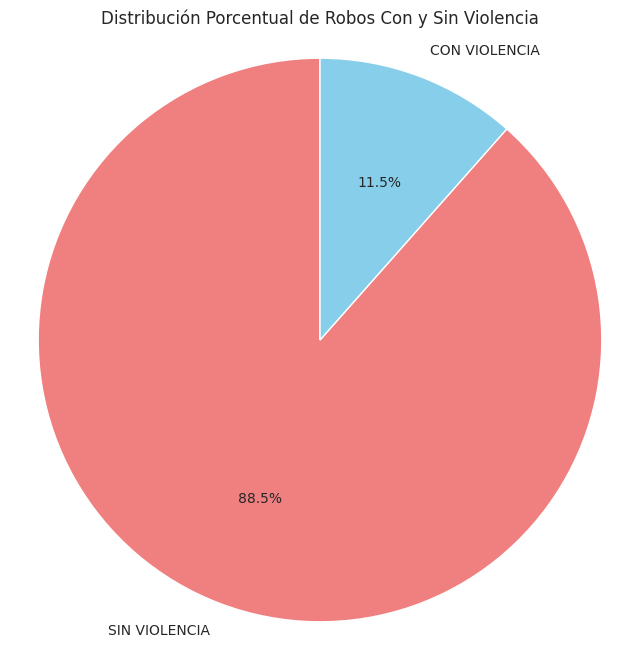


Distribución Porcentual de Robos Con y Sin Violencia:
tipo_violencia
SIN VIOLENCIA    88.47054
CON VIOLENCIA    11.52946
Name: count, dtype: float64


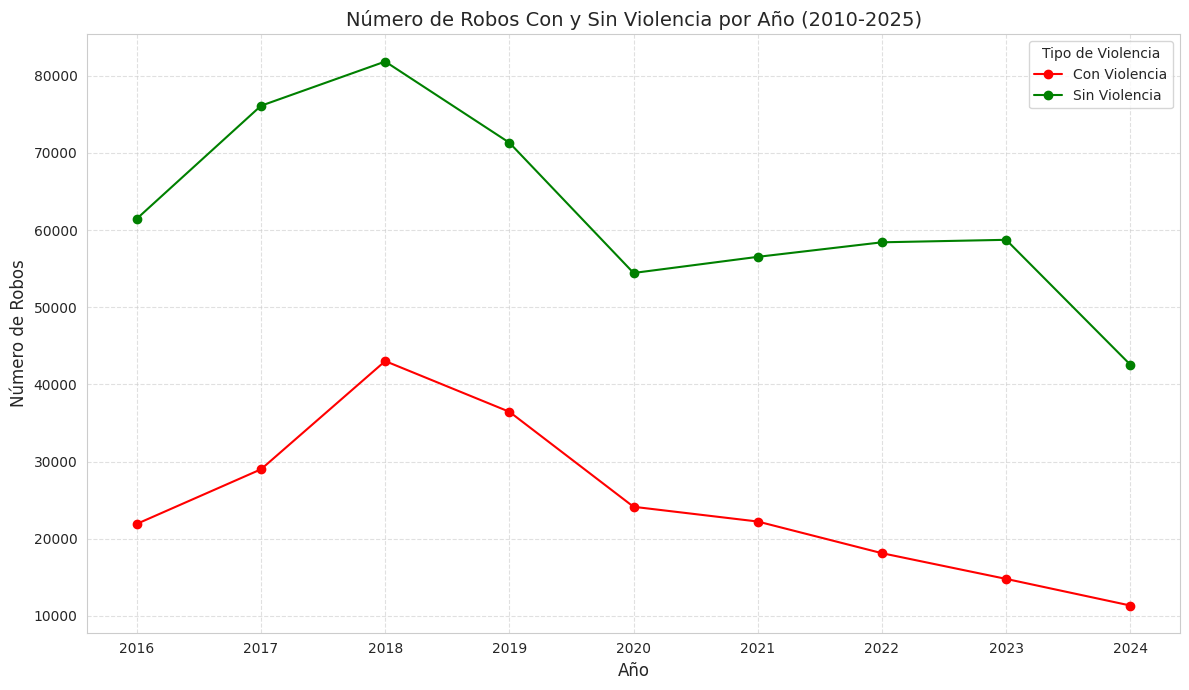


Tabla de Conteo de Robos por Año y Tipo de Violencia (2010-2025):


tipo_violencia,SIN VIOLENCIA,CON VIOLENCIA
fecha_hora_hecho,,
2016,61475,21926
2017,76116,28999
2018,81847,43024
2019,71325,36452
2020,54444,24139
2021,56534,22229
2022,58418,18126
2023,58741,14792
2024,42557,11343


In [30]:
import matplotlib.pyplot as plt
# --- Gráfico 1: Porcentaje de Robos con y Sin Violencia (Total) ---

# Asegúrate de que la columna 'tipo_violencia' ya ha sido creada y populada
# en las celdas anteriores.

# Calcular el número total de robos con y sin violencia
robos_violencia_counts = df['tipo_violencia'].value_counts()

# Calcular los porcentajes
total_robos_classified = robos_violencia_counts.sum()
porcentajes_violencia = (robos_violencia_counts / total_robos_classified) * 100

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(porcentajes_violencia, labels=porcentajes_violencia.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'skyblue'])
plt.title('Distribución Porcentual de Robos Con y Sin Violencia')
plt.axis('equal')  # Asegura que el pastel sea un círculo.
plt.show()

print("\nDistribución Porcentual de Robos Con y Sin Violencia:")
print(porcentajes_violencia)

# --- Gráfico 2: Robos por Tipo de Violencia a lo Largo de los Años (2010-2025) ---

# Asegúrate de que la columna 'tipo_violencia' ya ha sido creada y populada.
# Asegúrate de que 'fecha_hora_hecho' es un tipo datetime.

# Filtrar los datos para el rango de años 2010 a 2025 y solo robos
df_robos_años = df[
    (df['fecha_hora_hecho'].dt.year >= 2010) &
    (df['fecha_hora_hecho'].dt.year <= 2025) &
    (df['is_robbery'] == 1) # Solo considerar incidentes clasificados como robos
].copy()

# Agrupar por año y tipo de violencia, y contar los incidentes
robos_por_año_violencia = df_robos_años.groupby([df_robos_años['fecha_hora_hecho'].dt.year, 'tipo_violencia']).size().unstack(fill_value=0)

# Asegurarse de que las columnas 'CON VIOLENCIA' y 'SIN VIOLENCIA' existen
if 'CON VIOLENCIA' not in robos_por_año_violencia.columns:
    robos_por_año_violencia['CON VIOLENCIA'] = 0
if 'SIN VIOLENCIA' not in robos_por_año_violencia.columns:
    robos_por_año_violencia['SIN VIOLENCIA'] = 0

# Reordenar las columnas si es necesario
robos_por_año_violencia = robos_por_año_violencia[['SIN VIOLENCIA', 'CON VIOLENCIA']]

# Crear el gráfico de líneas
plt.figure(figsize=(12, 7))

plt.plot(robos_por_año_violencia.index, robos_por_año_violencia['CON VIOLENCIA'], marker='o', label='Con Violencia', color='red')
plt.plot(robos_por_año_violencia.index, robos_por_año_violencia['SIN VIOLENCIA'], marker='o', label='Sin Violencia', color='green')

plt.xlabel('Año', fontsize=12)
plt.ylabel('Número de Robos', fontsize=12)
plt.title('Número de Robos Con y Sin Violencia por Año (2010-2025)', fontsize=14)
plt.xticks(robos_por_año_violencia.index) # Asegura que se muestren todos los años
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Tipo de Violencia')
plt.tight_layout() # Ajustar diseño para evitar solapamiento
plt.show()

# Mostrar la tabla de conteos por año y tipo de violencia (opcional)
print("\nTabla de Conteo de Robos por Año y Tipo de Violencia (2010-2025):")
display(robos_por_año_violencia)

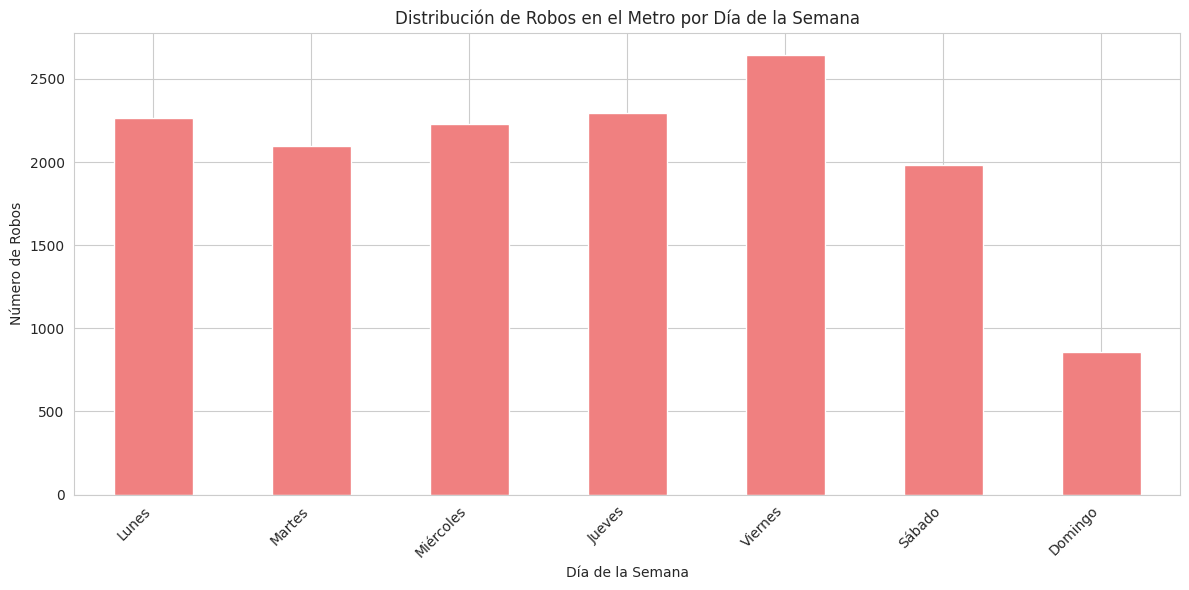

In [32]:
import matplotlib.pyplot as plt
# Asegúrate de usar df_metro o df_metro_filtered si ya lo has creado y filtrado
# Corrected: Use 'fecha_hora_hecho' instead of 'fecha_hecho'
df_metro['day_of_week'] = df_metro['fecha_hora_hecho'].dt.dayofweek # Asegúrate de que 'day_of_week' existe
# Ensure filtering by 'is_robbery' is applied if needed for this specific plot
# Based on the previous code, df_metro already contains only Metro robberies,
# so grouping by day and summing 'is_robbery' (which is 1 for these rows) is equivalent to counting.
# If df_metro contained non-robberies, explicit filtering would be needed here.
metro_robberies_by_day = df_metro.groupby('day_of_week').size() # Use size() to count rows

# Mapear números de día a nombres de día para mejor legibilidad
days = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
metro_robberies_by_day.index = days
metro_robberies_by_day.plot(kind='bar', color='lightcoral')
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Robos')
plt.title('Distribución de Robos en el Metro por Día de la Semana')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Adding 'tipo_violencia' to df_metro...

VERIFICACIÓN: Distribución de 'tipo_violencia' en df_metro (usando el DataFrame existente):
tipo_violencia
SIN VIOLENCIA    14444
CON VIOLENCIA     1225
Name: count, dtype: int64


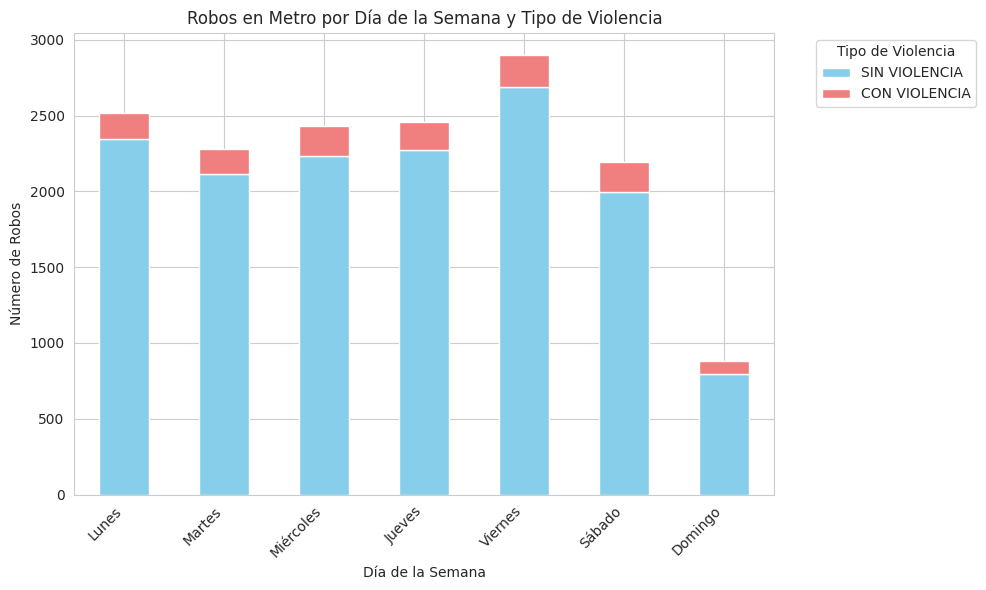

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure df is defined and contains the 'fecha_hora_hecho', 'delito', and 'is_robbery' columns.

# --- Create 'tipo_violencia' column in the main df DataFrame (ADJUSTED LOGIC) ---
# Define keywords for violent and non-violent acts based on data inspection
# Assuming 'CON VIOLENCIA' and 'SIN VIOLENCIA' are the primary indicators in 'delito' or 'categoria_delito'
# Re-creating tipo_violencia here for safety, using a simpler check based on the presence of 'CON VIOLENCIA'
# This should align with how it was created in previous cells if they ran correctly.
def classify_violence_simple(row):
    if pd.isna(row['delito']):
        return 'DESCONOCIDO'
    if 'CON VIOLENCIA' in str(row['delito']).upper():
        return 'CON VIOLENCIA'
    # Assuming if it's a ROBBERY and no explicit 'CON VIOLENCIA' keyword, it's 'SIN VIOLENCIA'
    # This assumption is critical - verify it with your data
    return 'SIN VIOLENCIA' # Default for non-violent or not explicitly marked violent

# Apply the function to the main df DataFrame
df['tipo_violencia'] = df.apply(classify_violence_simple, axis=1)


# Ensure 'fecha_hora_hecho' is a datetime object in df
# This should already be the case if previous cleaning steps ran, but as a safeguard:
df['fecha_hora_hecho'] = pd.to_datetime(df['fecha_hora_hecho'], errors='coerce')
df.dropna(subset=['fecha_hora_hecho', 'tipo_violencia'], inplace=True) # Remove rows with invalid dates or missing violence type


# --- Use the existing df_metro DataFrame ---
# Assuming df_metro was correctly created in a previous step
# (e.g., in the "Limpieza, Creación de Variables y Filtrado" section)
# and already contains only Metro robberies with the 'fecha_hora_hecho' and 'tipo_violencia' columns.

# Verify the distribution of tipo_violencia in df_metro
if 'df_metro' in locals() and isinstance(df_metro, pd.DataFrame) and not df_metro.empty:
    # Ensure df_metro also has the latest 'tipo_violencia' if it was re-created in df
    if 'tipo_violencia' not in df_metro.columns:
         # If tipo_violencia wasn't copied to df_metro in the cleaning step, merge it
         print("Adding 'tipo_violencia' to df_metro...")
         df_metro = pd.merge(df_metro, df[['fecha_hora_hecho', 'delito', 'tipo_violencia']],
                             on=['fecha_hora_hecho', 'delito'], how='left')
         df_metro.dropna(subset=['tipo_violencia'], inplace=True)


    print("\nVERIFICACIÓN: Distribución de 'tipo_violencia' en df_metro (usando el DataFrame existente):")
    print(df_metro['tipo_violencia'].value_counts())

    # --- Continue with your original code for plotting, using the existing df_metro ---

    # Create 'day_of_week' feature (0=Monday, 6=Sunday) in df_metro
    # Use 'fecha_hora_hecho' as it exists
    df_metro['day_of_week'] = df_metro['fecha_hora_hecho'].dt.dayofweek

    # --- Gráfico 1: Total de Robos en Metro por Día de la Semana (Apilado por Violencia) ---

    # Group by day of week and violence type
    # Since df_metro already contains only Metro robberies, we just need to count rows
    robberies_by_day_violence = df_metro.groupby(['day_of_week', 'tipo_violencia']).size().unstack(fill_value=0)


    # Reorder columns for plotting (SIN VIOLENCIA first)
    cols_order = []
    if 'SIN VIOLENCIA' in robberies_by_day_violence.columns:
        cols_order.append('SIN VIOLENCIA')
    if 'CON VIOLENCIA' in robberies_by_day_violence.columns:
        cols_order.append('CON VIOLENCIA')
    # Add any other columns (like DESCONOCIDO, AMBIGUO) that might exist
    cols_order.extend([col for col in robberies_by_day_violence.columns if col not in cols_order])

    robberies_by_day_violence = robberies_by_day_violence[cols_order]


    # Plotting
    ax = robberies_by_day_violence.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'lightcoral', 'gray', 'orange']) # Add colors for other categories
    plt.xlabel('Día de la Semana')
    plt.ylabel('Número de Robos')
    plt.title('Robos en Metro por Día de la Semana y Tipo de Violencia')
    plt.xticks(ticks=range(7), labels=['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'], rotation=45, ha='right')
    plt.legend(title='Tipo de Violencia', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

else:
    print("Error: DataFrame 'df_metro' no encontrado, vacío o no válido. No se puede generar el gráfico.")

## Analisis a hacer: Analisis de patrones mensuales, analisis de patrones horarios

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmw70npsm/v0iulpa8.json


Datos preparados para Prophet (primeras filas):
          ds    y
0 2016-01-01  122
1 2016-01-02  187
2 2016-01-03  179
3 2016-01-04  288
4 2016-01-05  235


DEBUG:cmdstanpy:input tempfile: /tmp/tmpmw70npsm/2rb05t62.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62186', 'data', 'file=/tmp/tmpmw70npsm/v0iulpa8.json', 'init=/tmp/tmpmw70npsm/2rb05t62.json', 'output', 'file=/tmp/tmpmw70npsm/prophet_model2zianarp/prophet_model-20250523012354.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:23:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:23:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Modelo Prophet entrenado.

DataFrame futuro (primeras filas):
          ds
0 2016-01-01
1 2016-01-02
2 2016-01-03
3 2016-01-04
4 2016-01-05

Predicciones (primeras filas):
          ds        yhat  yhat_lower  yhat_upper
0 2016-01-01  206.294500  173.607839  242.744166
1 2016-01-02  164.538902  129.379026  202.117335
2 2016-01-03  126.657853   91.053693  161.063887
3 2016-01-04  191.406452  155.294925  227.297774
4 2016-01-05  194.691311  160.636219  230.996295


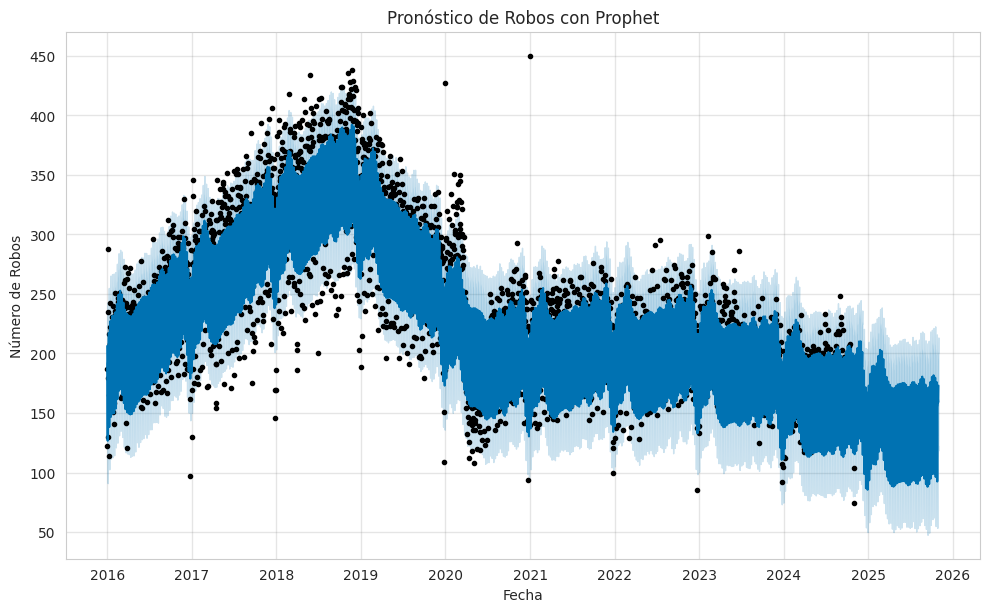

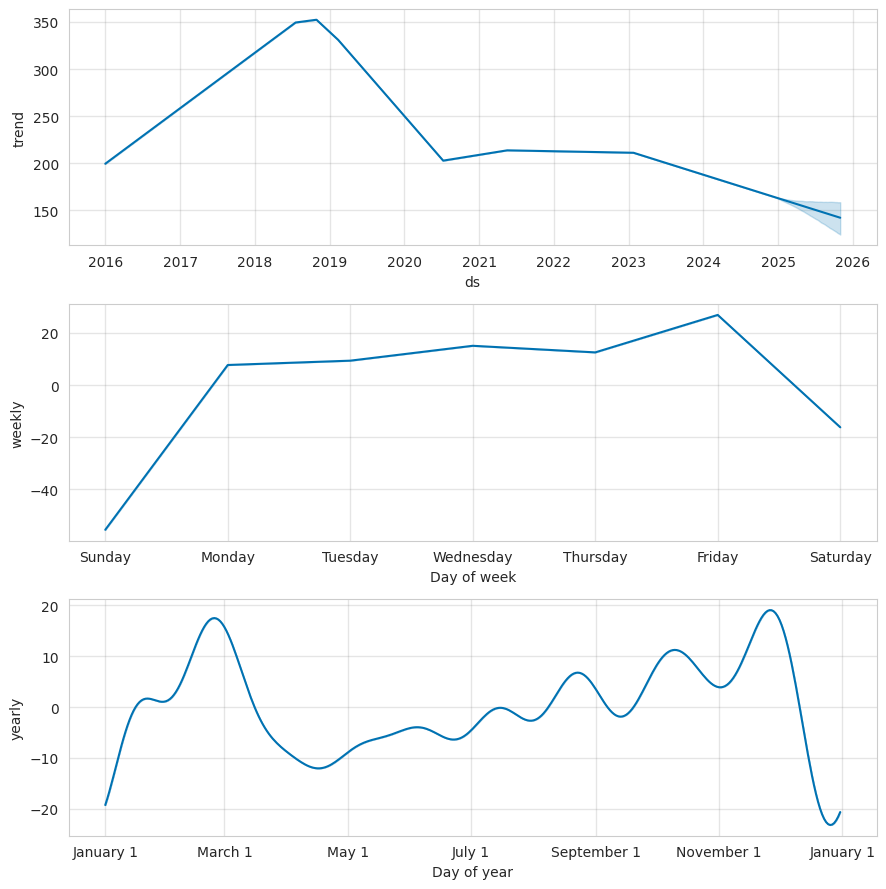

In [37]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Asegúrate de que el DataFrame 'df' está cargado y limpio como en tus pasos anteriores
# y que la columna 'is_robbery' y 'fecha_hora_hecho' existen y están en el formato correcto.

# 1. Preparar los datos para Prophet
# Agrupar por fecha y contar el número total de robos por día
# Using 'fecha_hora_hecho' instead of 'fecha_hecho' and resampling to 'D' for daily counts
df_prophet = df.set_index('fecha_hora_hecho')['is_robbery'].resample('D').sum().reset_index()

# Renombrar las columnas para que Prophet las entienda ('ds' para fecha, 'y' para el valor)
df_prophet = df_prophet.rename(columns={'fecha_hora_hecho': 'ds', 'is_robbery': 'y'})

# Asegurarse de que la columna 'ds' es de tipo datetime
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

# Remove any potential NaN values that might result from resampling missing dates
df_prophet.dropna(subset=['ds', 'y'], inplace=True)


print("Datos preparados para Prophet (primeras filas):")
print(df_prophet.head())

# 2. Inicializar y ajustar el modelo Prophet
# Puedes ajustar los parámetros del modelo si es necesario, por ejemplo, seasonality_mode
# m = Prophet(seasonality_mode='yearly') # Ejemplo: añadir estacionalidad anual
# Using default Prophet parameters for now
m = Prophet()

# Ajustar el modelo a tus datos
# Ensure there is enough data to fit the model (Prophet requires at least 2 data points for non-daily data, and recommends more)
if len(df_prophet) > 1:
    try:
        m.fit(df_prophet)
        print("\nModelo Prophet entrenado.")
    except Exception as e:
        print(f"\nError al entrenar el modelo Prophet: {e}")
        m = None # Set m to None if fitting fails
else:
    print("\nNo hay suficientes datos en df_prophet para entrenar el modelo Prophet.")
    m = None # Set m to None if there's not enough data


if m is not None:
    # 3. Crear un DataFrame futuro
    # Especifica cuántos días (o la frecuencia que necesites, ej. 'H' para horas [1]) quieres pronosticar
    # Pronosticar para el próximo año (365 días)
    future = m.make_future_dataframe(periods=365)

    print("\nDataFrame futuro (primeras filas):")
    print(future.head())

    # 4. Hacer predicciones
    fcst = m.predict(future)

    print("\nPredicciones (primeras filas):")
    print(fcst[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

    # 5. Visualizar los resultados
    fig1 = m.plot(fcst)
    plt.title("Pronóstico de Robos con Prophet")
    plt.xlabel("Fecha")
    plt.ylabel("Número de Robos")
    plt.show()

    # Visualizar los componentes del pronóstico (tendencia, estacionalidad)
    fig2 = m.plot_components(fcst)
    plt.show()
else:
    print("\nEl modelo Prophet no pudo ser entrenado. No se generarán pronósticos ni visualizaciones.")